# <center> <font color="Blue"> Credit Card Churn Prediction </center>

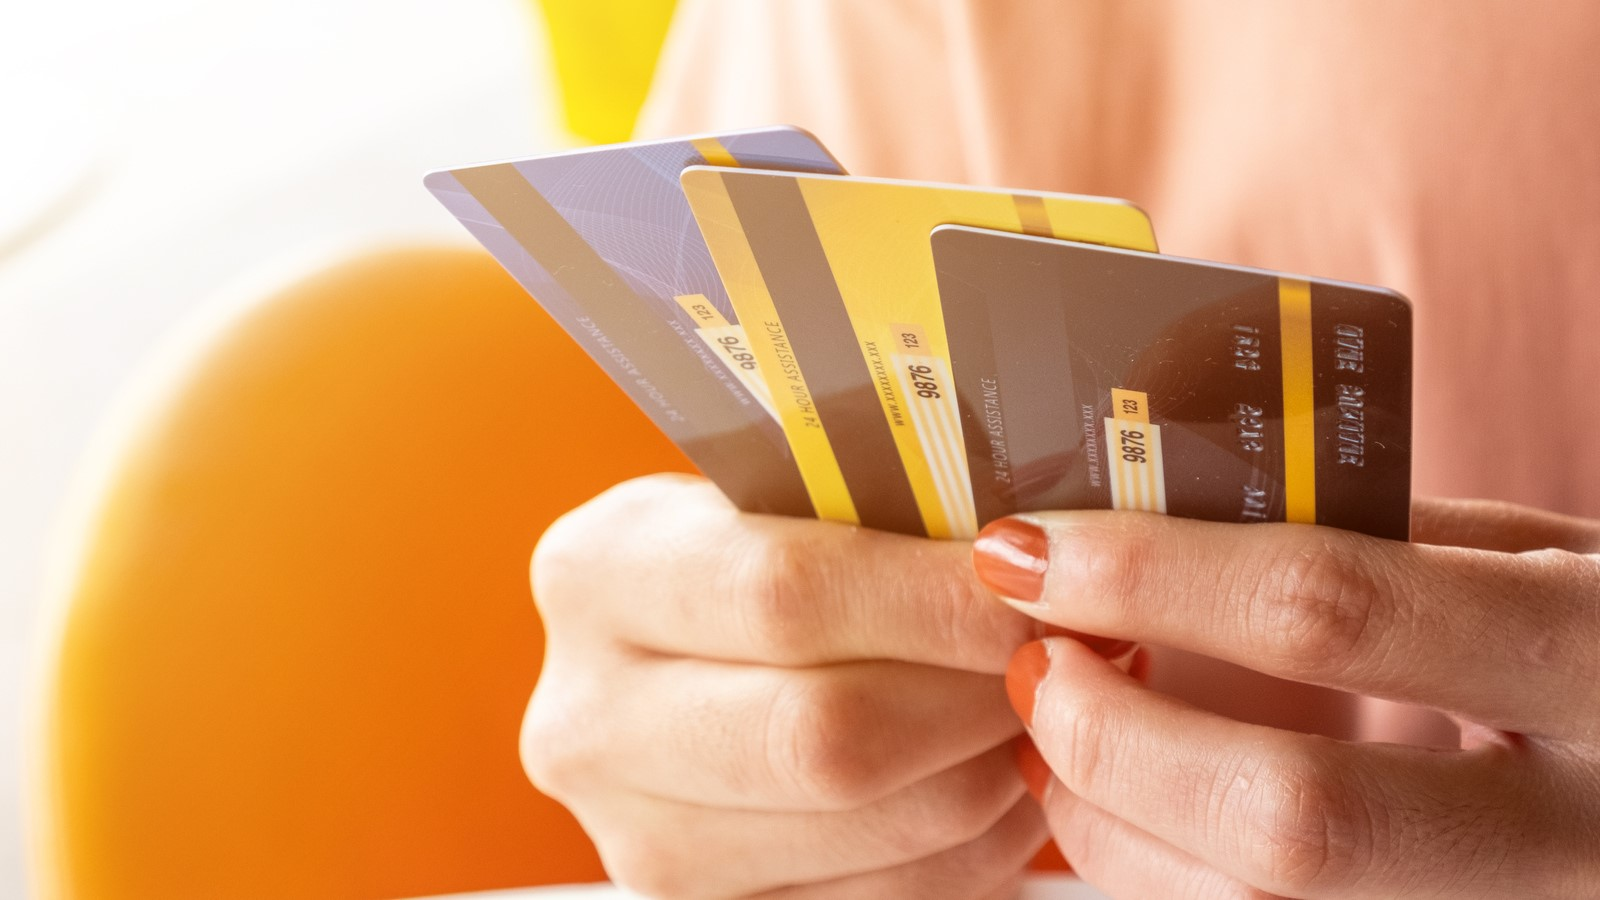

## Business Problem
### A business manager of a consumer credit card bank is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

## Goal: 

### Creating a Classification Model that can predict customers who are likely to drop off.¶

## Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')#to ignore warnings

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 100)

## <font color="Green">Loading Dataset

In [2]:
df = pd.read_csv("credit_card_churn.csv")

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3      12691.00                  777         11914.00   
1                      2       8256.00                  864          7392.00   
2                      0       3418.00                    0          3418.00   
3                      1       3313.00                 2517           796.00   
4                      0       4716.00                    0          4716.00   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                  1.33             1144              42                 1.62   
1                  1.54             1291              33                 3.71   
2                  2.59             1887              20                 2.33   
3                  1.41             1171              20                 2.33   
4                  2.17              816              28                 2.50   

   Avg_Utilization_Ratio  
0                   0.06  
1                   0.10  
2                   0.00  
3                   0.76  
4                   0.00

## <font color="Green">Data Dictionary

**CLIENTNUM**-
- Client number. Unique identifier for the customer holding the account

**Attrition_Flag**
- Internal event (customer activity) variable - if the account is closed then 1 else 0

**Customer_Age**
- Demographic variable - Customer's Age in Years

**Gender**
- Demographic variable - M=Male, F=Female

**Dependent_count**
- Demographic variable - Number of dependents

**Education_Level**
- Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

**Marital_Status**
- Demographic variable - Married, Single, Divorced, Unknown

**Income_Category**
- Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

**Card_Category**
- Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

**Months_on_book**
- Period of relationship with bank

**Total_Relationship_Count**
- Total no. of products held by the customer

**Months_Inactive_12_mon**
- No. of months inactive in the last 12 months
 
**Contacts_Count_12_mon**
- No. of Contacts in the last 12 months

**Credit_Limit**
- Credit Limit on the Credit Card

**Total_Revolving_Bal**
- Total Revolving Balance on the Credit Card

**Avg_Open_To_Buy**
- Open to Buy Credit Line (Average of last 12 months)

**Total_Amt_Chng_Q4_Q1**
- Change in Transaction Amount (Q4 over Q1)

**Total_Trans_Amt**
- Total Transaction Amount (Last 12 months)

**Total_Trans_Ct**
- Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1**
- Change in Transaction Count (Q4 over Q1)

**Avg_Utilization_Ratio**
- Average Card Utilization Ratio

In [4]:
print("******* Data Shape *******")
df.shape

******* Data Shape *******


(10127, 21)

In [5]:
print("******* Data Information *******")
df.info()

******* Data Information *******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10

In [6]:
print("******* Data Types *******")
df.dtypes

******* Data Types *******


CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
print("******* Data Summary *******")
df.describe().transpose()

******* Data Summary *******


count         mean         std          min  \
CLIENTNUM                10127.00 739177606.33 36903783.45 708082083.00   
Customer_Age             10127.00        46.33        8.02        26.00   
Dependent_count          10127.00         2.35        1.30         0.00   
Months_on_book           10127.00        35.93        7.99        13.00   
Total_Relationship_Count 10127.00         3.81        1.55         1.00   
Months_Inactive_12_mon   10127.00         2.34        1.01         0.00   
Contacts_Count_12_mon    10127.00         2.46        1.11         0.00   
Credit_Limit             10127.00      8631.95     9088.78      1438.30   
Total_Revolving_Bal      10127.00      1162.81      814.99         0.00   
Avg_Open_To_Buy          10127.00      7469.14     9090.69         3.00   
Total_Amt_Chng_Q4_Q1     10127.00         0.76        0.22         0.00   
Total_Trans_Amt          10127.00      4404.09     3397.13       510.00   
Total_Trans_Ct           10127.00        64.86       23.47        10.00   
Total_Ct_Chng_Q4_Q1      10127.00         0.71        0.24         0.00   
Avg_Utilization_Ratio    10127.00         0.27        0.28         0.00   

                                  25%          50%          75%          max  
CLIENTNUM                713036770.50 717926358.00 773143533.00 828343083.00  
Customer_Age                    41.00        46.00        52.00        73.00  
Dependent_count                  1.00         2.00         3.00         5.00  
Months_on_book                  31.00        36.00        40.00        56.00  
Total_Relationship_Count         3.00         4.00         5.00         6.00  
Months_Inactive_12_mon           2.00         2.00         3.00         6.00  
Contacts_Count_12_mon            2.00         2.00         3.00         6.00  
Credit_Limit                  2555.00      4549.00     11067.50     34516.00  
Total_Revolving_Bal            359.00      1276.00      1784.00      2517.00  
Avg_Open_To_Buy               1324.50      3474.00      9859.00     34516.00  
Total_Amt_Chng_Q4_Q1             0.63         0.74         0.86         3.40  
Total_Trans_Amt               2155.50      3899.00      4741.00     18484.00  
Total_Trans_Ct                  45.00        67.00        81.00       139.00  
Total_Ct_Chng_Q4_Q1              0.58         0.70         0.82         3.71  
Avg_Utilization_Ratio            0.02         0.18         0.50         1.00

In [8]:
print("******* Null Values *******")
df.isnull().sum()

******* Null Values *******


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Hence there are no null values in the data.

In [9]:
#Renaming the dependent columns as 'Target' 
df.rename(columns = {'Attrition_Flag':'Target'}, inplace = True)
df= df.replace({"Target":{"Existing Customer":0,"Attrited Customer":1}})

In [10]:
#accumulate categorical columns
object_columns = []
for obj in df.columns:
    if df[obj].dtype == np.object:
        object_columns.append(obj)
print(object_columns)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [11]:
#Let's check the Value Counts for all the Object Type Columns.
for c in df[object_columns]:
    print(f"======={c}=======")
    print(df[c].value_counts())

=======Gender=======
F    5358
M    4769
Name: Gender, dtype: int64
=======Education_Level=======
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
=======Marital_Status=======
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
=======Income_Category=======
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
=======Card_Category=======
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [12]:
#Creating new categorical values for 'Income_Category' column.
df= df.replace({"Income_Category":{"Less than $40K":"Low","$40K - $60K":"Medium","$60K - $80K":"Fair","$80K - $120K":"High","$120K +":"Very High","Unknown":"Unknown"}}) #creating target column

In [13]:
#dropping the Client Nummber feature
df = df.drop("CLIENTNUM",axis=1)

In [14]:
#Get all numeric type columns
num_columns = []
for obj in df.columns:
    if df[obj].dtype != np.object:
        num_columns.append(obj)
print(num_columns)

['Target', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [15]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

Target  Customer_Age  Dependent_count  Months_on_book  \
count 10127.00      10127.00         10127.00        10127.00   
mean      0.16         46.33             2.35           35.93   
std       0.37          8.02             1.30            7.99   
min       0.00         26.00             0.00           13.00   
10%       0.00         36.00             1.00           26.00   
25%       0.00         41.00             1.00           31.00   
50%       0.00         46.00             2.00           36.00   
75%       0.00         52.00             3.00           40.00   
95%       1.00         60.00             4.00           50.00   
98%       1.00         63.00             5.00           53.00   
99%       1.00         65.00             5.00           56.00   
100%      1.00         73.00             5.00           56.00   
max       1.00         73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
10%                        2.00                    1.00   
25%                        3.00                    2.00   
50%                        4.00                    2.00   
75%                        5.00                    3.00   
95%                        6.00                    4.00   
98%                        6.00                    5.00   
99%                        6.00                    6.00   
100%                       6.00                    6.00   
max                        6.00                    6.00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.00      10127.00             10127.00   
mean                    2.46       8631.95              1162.81   
std                     1.11       9088.78               814.99   
min                     0.00       1438.30                 0.00   
10%                     1.00       1762.00                 0.00   
25%                     2.00       2555.00               359.00   
50%                     2.00       4549.00              1276.00   
75%                     3.00      11067.50              1784.00   
95%                     4.00      34516.00              2517.00   
98%                     5.00      34516.00              2517.00   
99%                     5.00      34516.00              2517.00   
100%                    6.00      34516.00              2517.00   
max                     6.00      34516.00              2517.00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count         10127.00              10127.00         10127.00        10127.00   
mean           7469.14                  0.76          4404.09           64.86   
std            9090.69                  0.22          3397.13           23.47   
min               3.00                  0.00           510.00           10.00   
10%             683.00                  0.53          1501.00           33.00   
25%            1324.50                  0.63          2155.50           45.00   
50%            3474.00                  0.74          3899.00           67.00   
75%            9859.00                  0.86          4741.00           81.00   
95%           32183.40                  1.10         14212.00          105.00   
98%           33427.88                  1.33         15281.48          118.00   
99%           34294.14                  1.51         15882.36          123.00   
100%          34516.00                  3.40         18484.00          139.00   
max           34516.00                  3.40         18484.00          139.00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count             10127.00               10127.00  
mean                  0.71                   0.27  
std                   0.24              

## <font color="Blue">Data Visualization

Text(0.5, 1.0, 'Countplot for Target Feature')

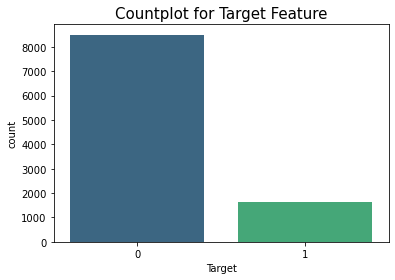

In [16]:
#Creating a count plot that shows the total counts per target value.
ax = sns.countplot(df["Target"], palette='viridis')
ax.set_title('Countplot for Target Feature', fontsize=15)

In [17]:
df["Target"].value_counts()

0    8500
1    1627
Name: Target, dtype: int64

### Countplot

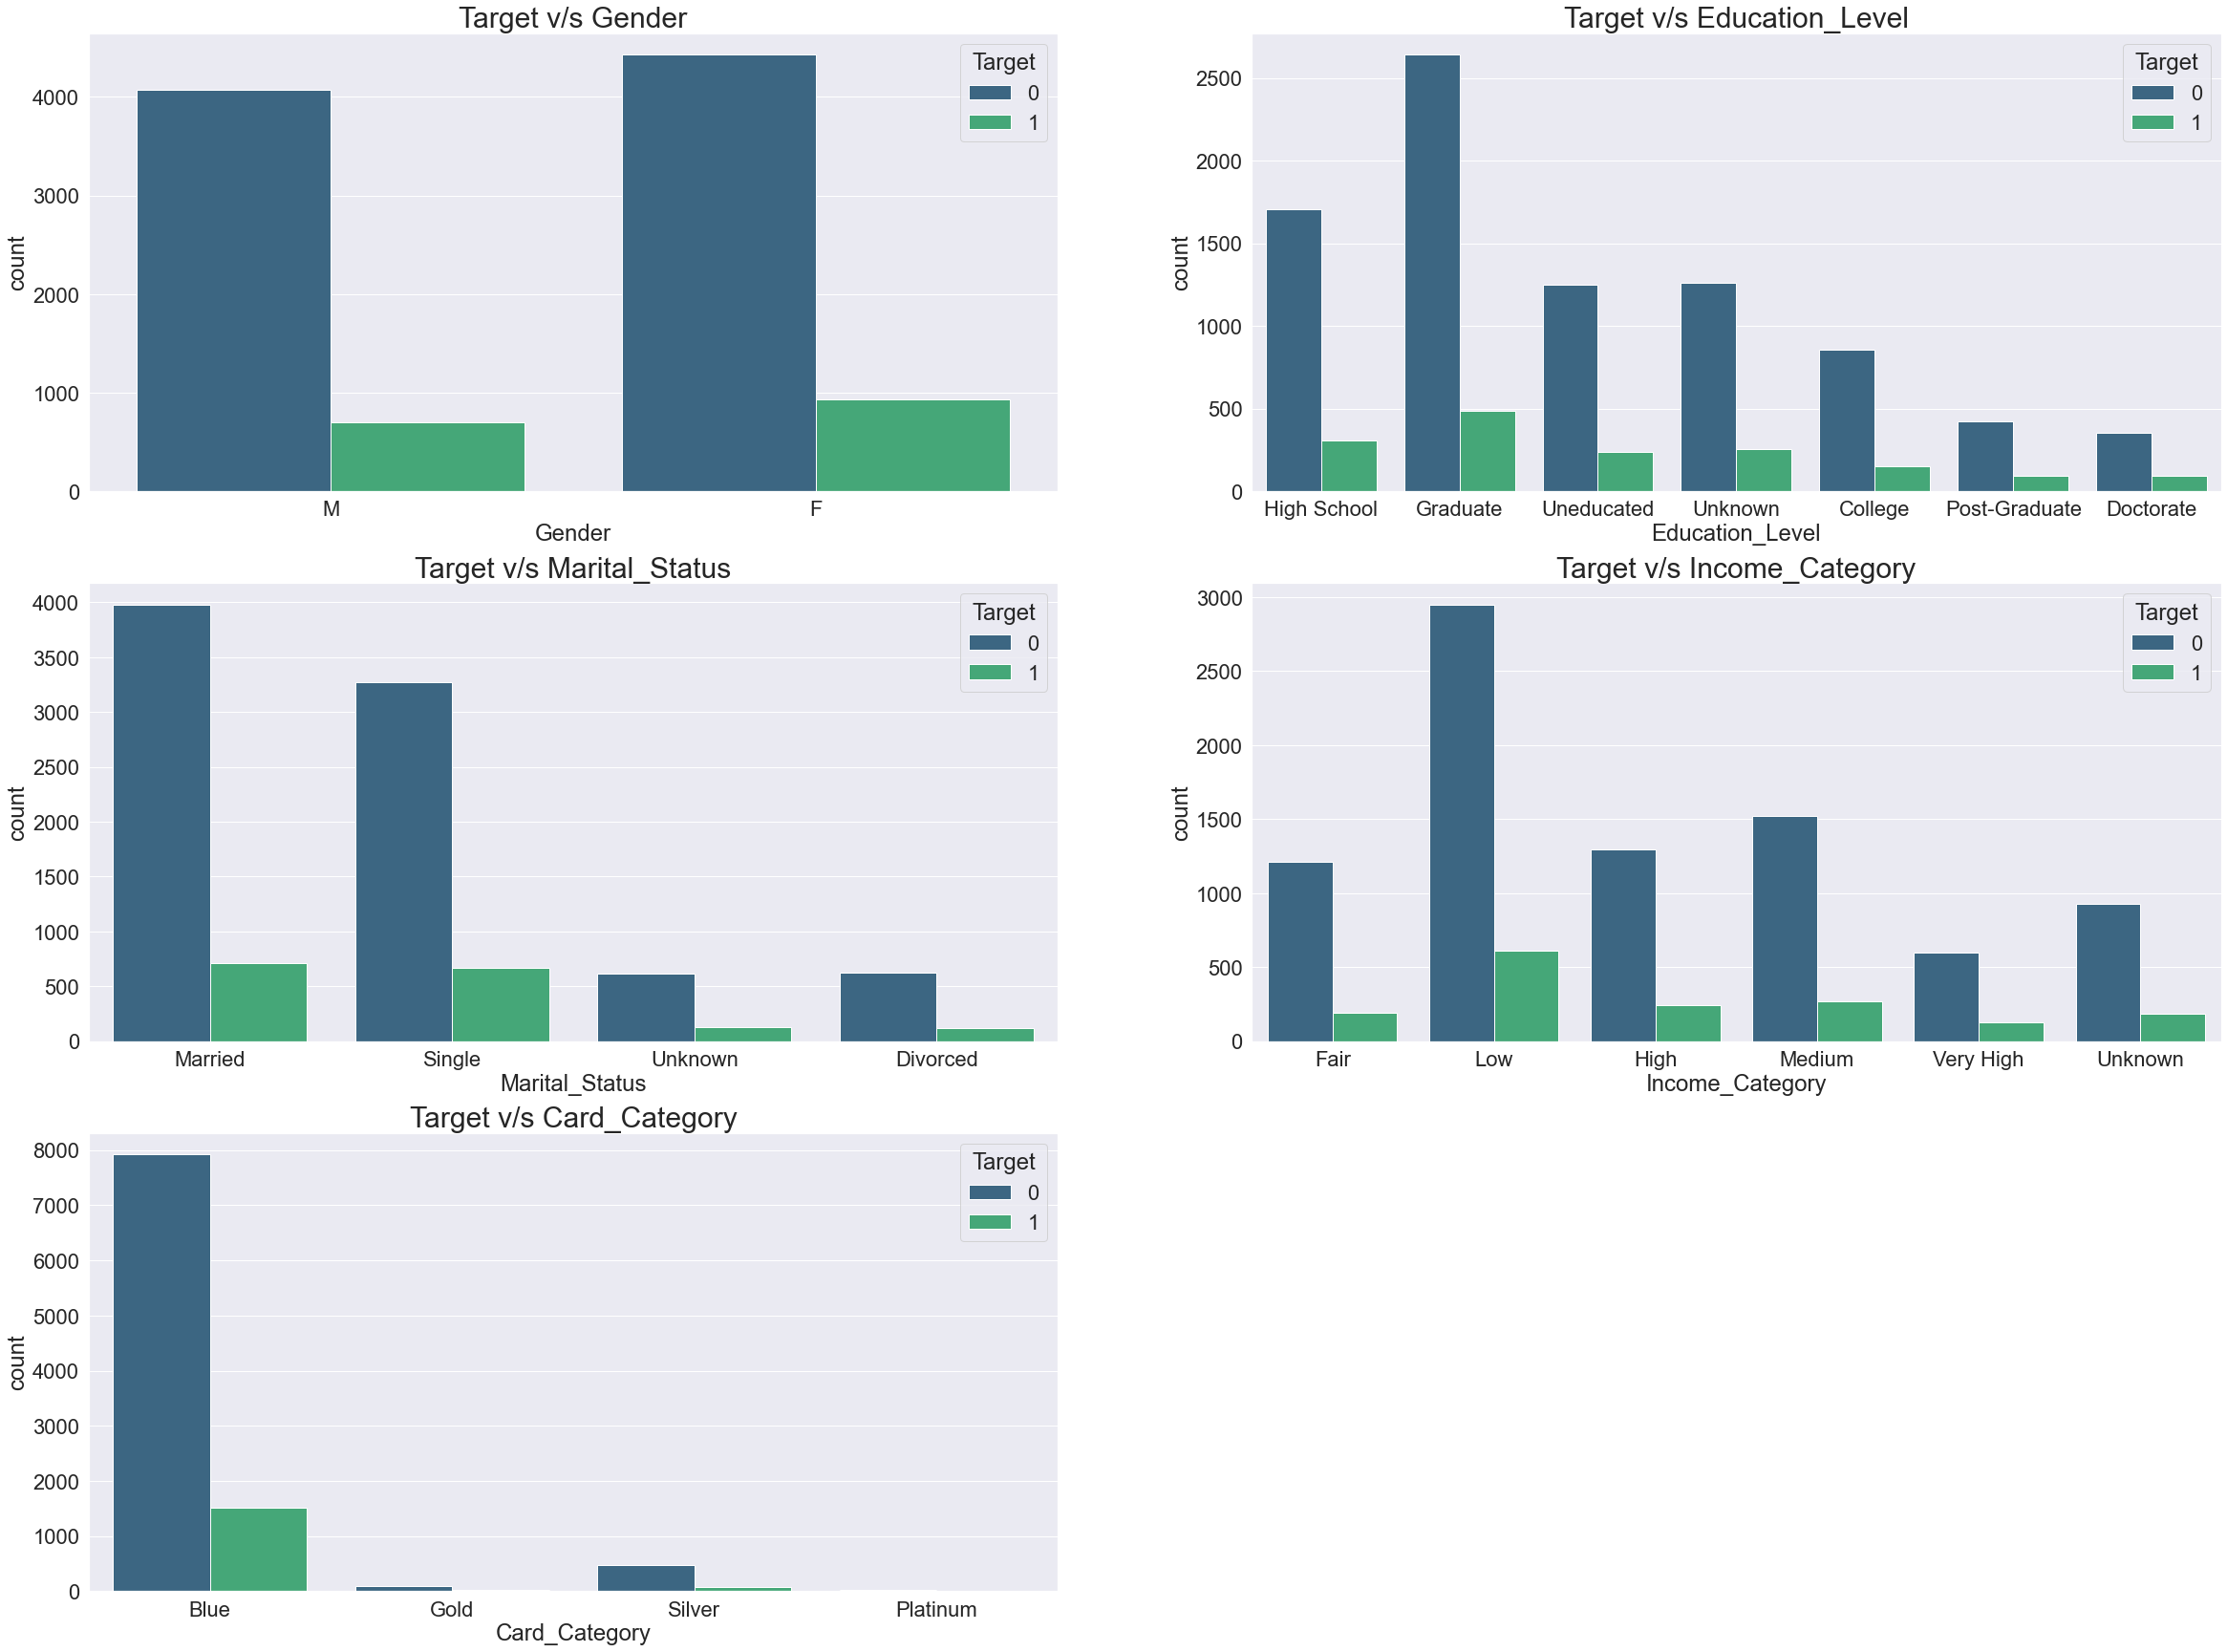

In [18]:
vars = df[object_columns]
plt.figure(figsize=(40,30))
sns.set(font_scale=2)
for i in range(len(vars.columns)):
    plt.subplot(3,2, i + 1)
    
    ax=sns.countplot(x=vars.columns[i], data=df,palette = 'viridis',hue='Target')
    ax.set_title('Target v/s '+str(vars.columns[i]), fontsize=30)
    
plt.show()

### Pairplot

In [19]:
df_nums=df[num_columns]

<Figure size 3600x2160 with 0 Axes>

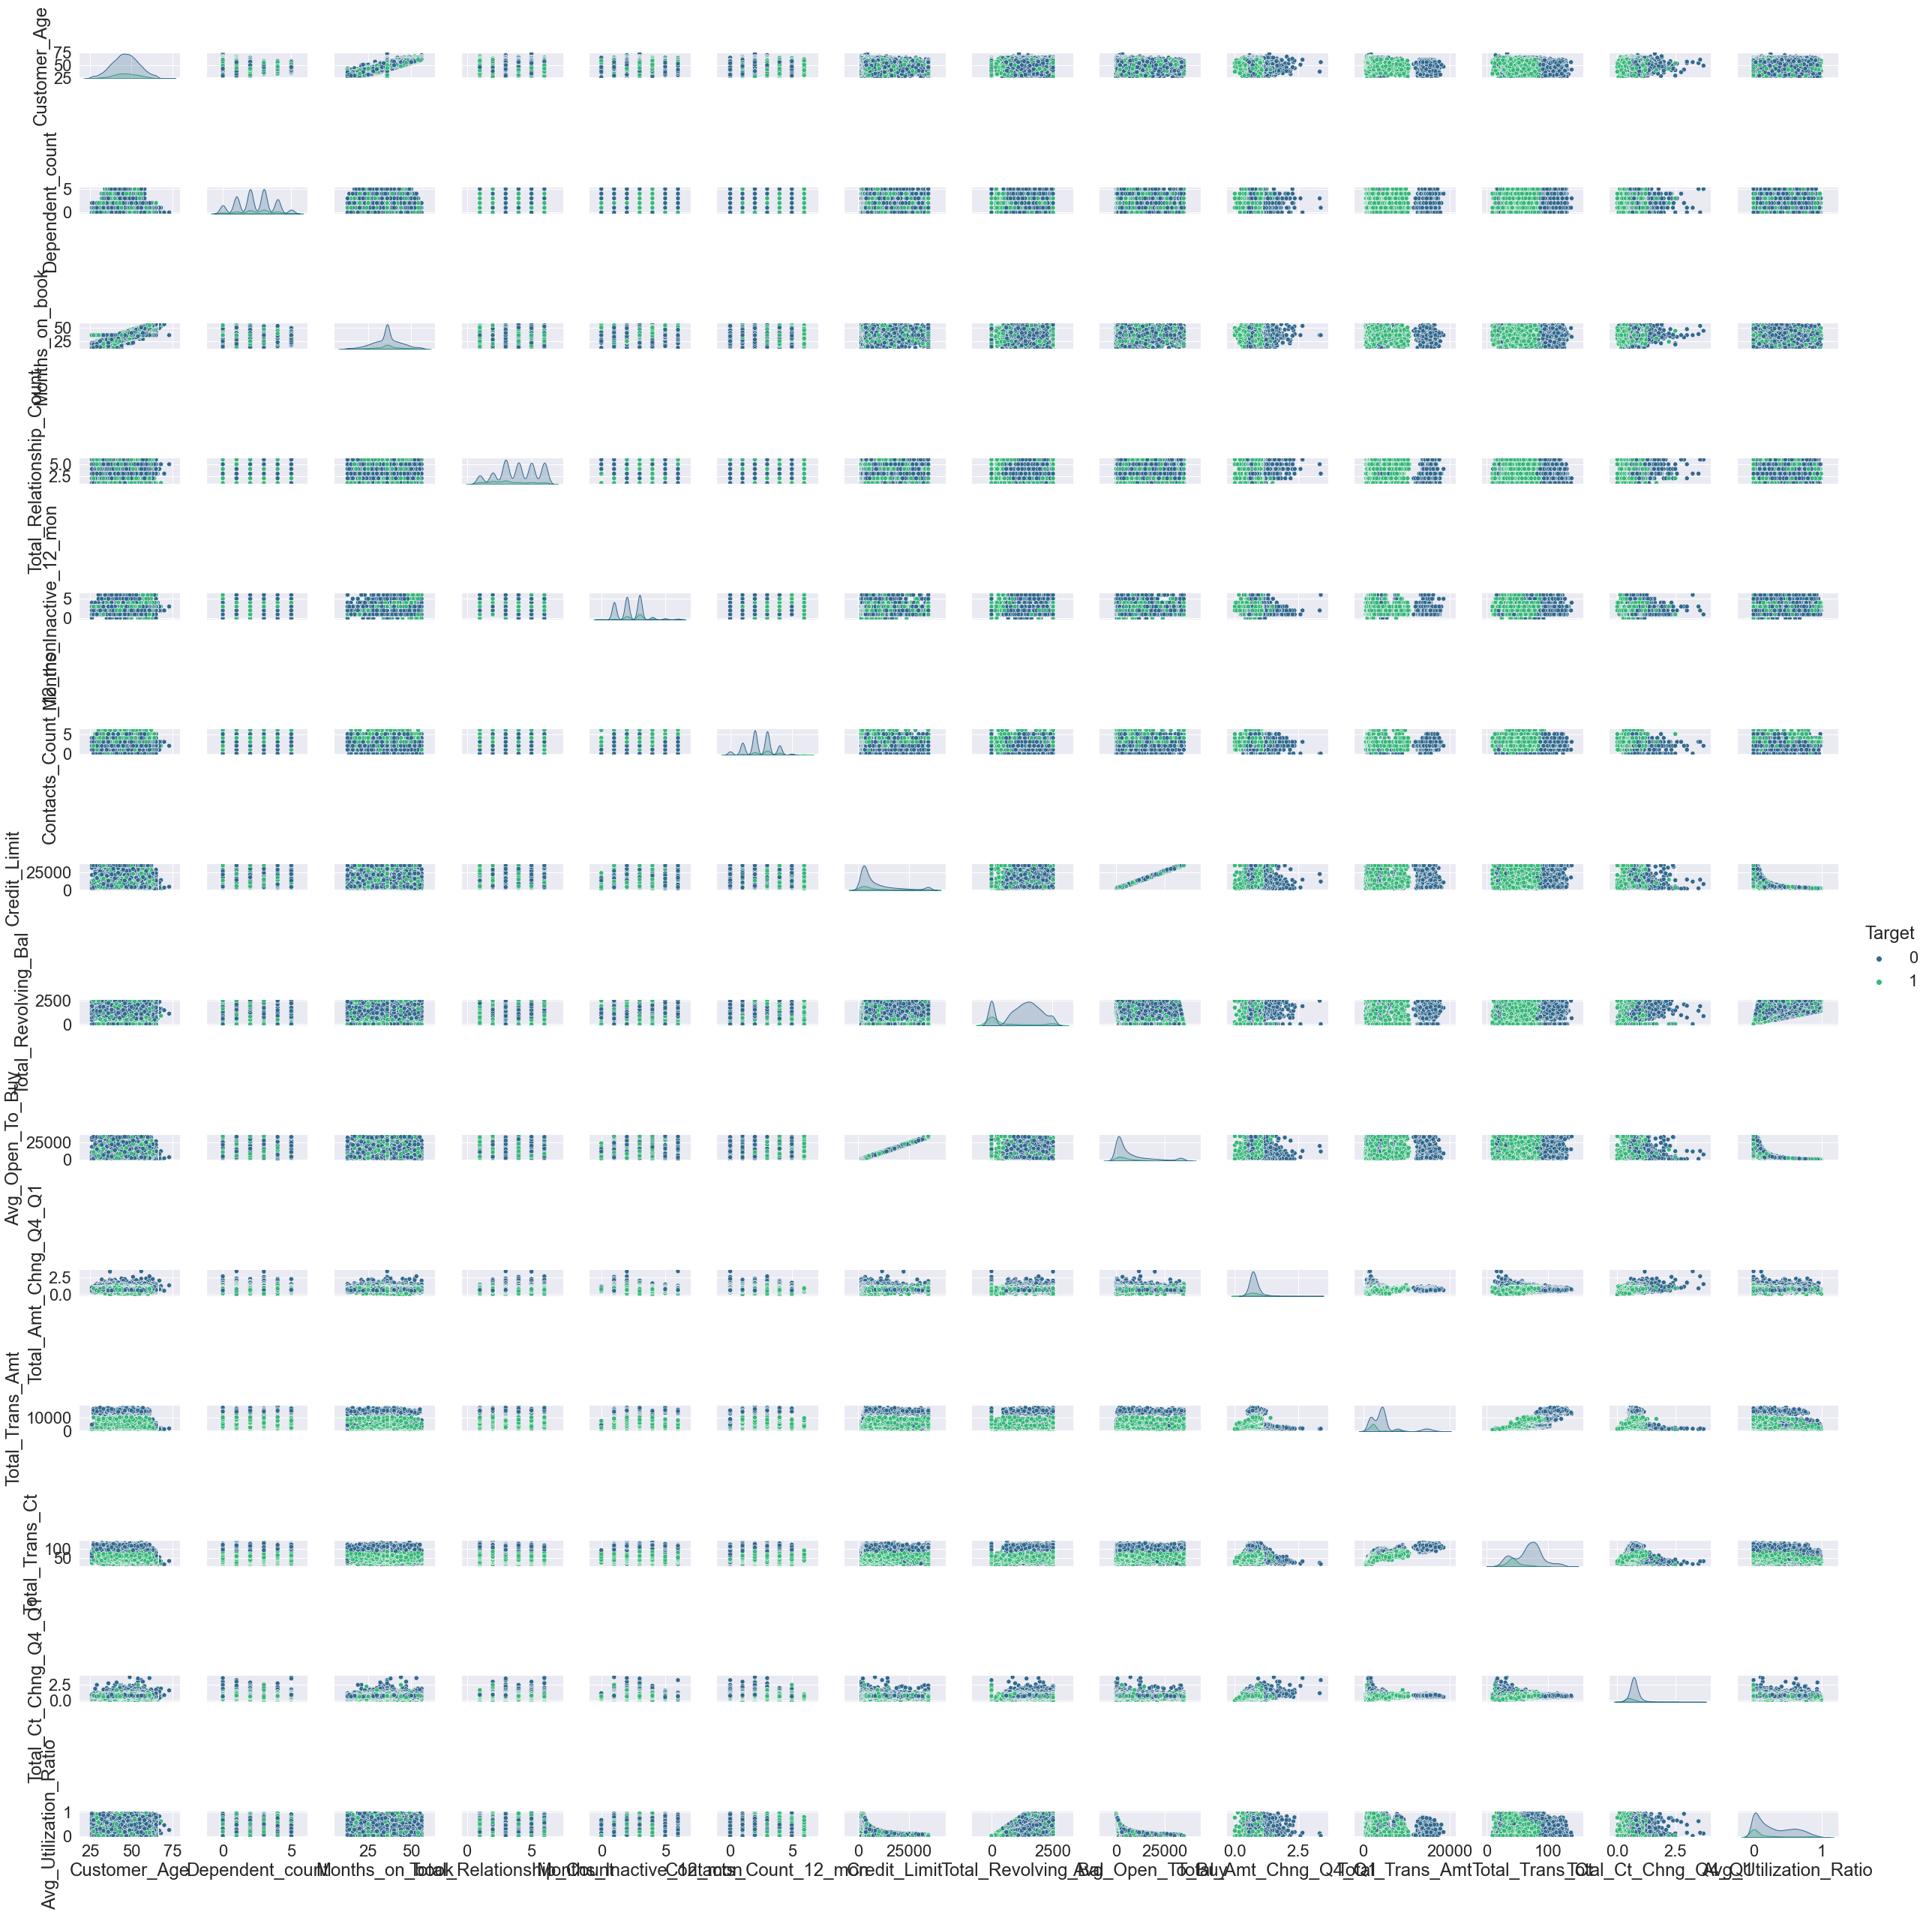

In [20]:
plt.figure(figsize=(50,30))
sns.set(font_scale=2)
sns.pairplot(data=df_nums, hue="Target", palette = 'viridis')

### Distribution Plot for Numerical Columns

In [21]:
num_columns.pop(0)

'Target'

In [22]:
print(num_columns)

['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [23]:
df_nums=df[num_columns]

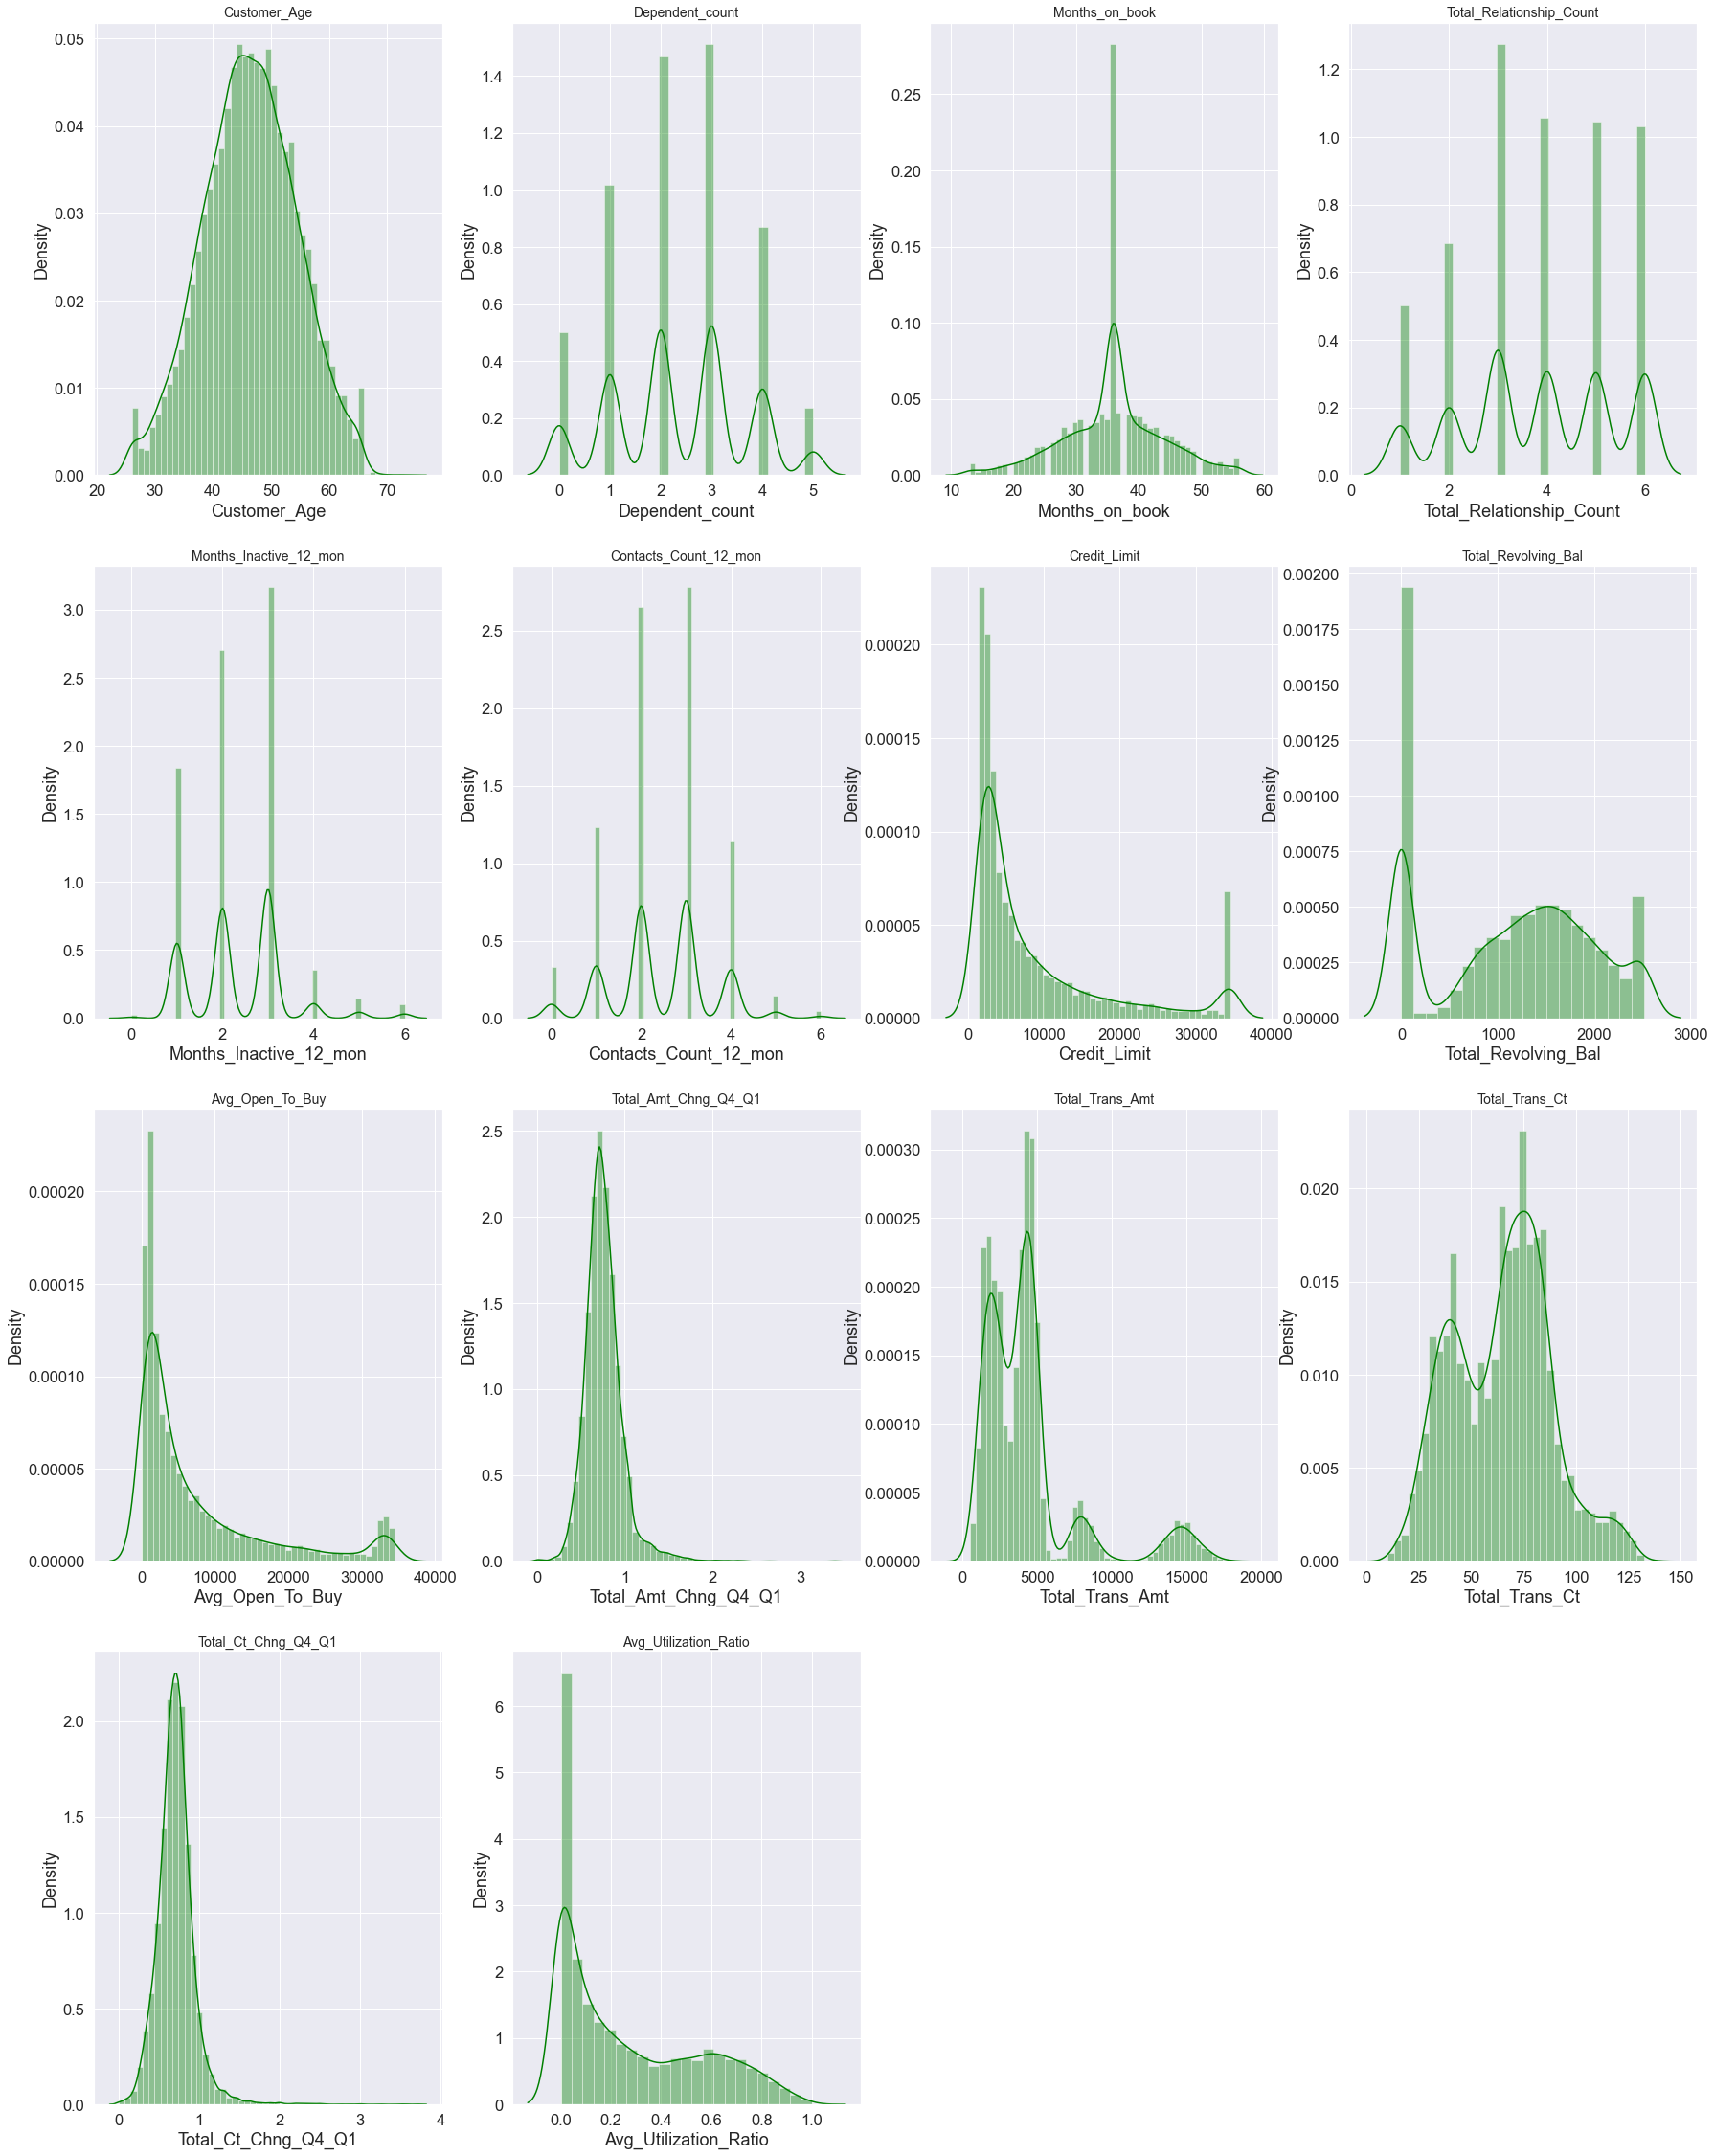

In [24]:
plt.figure(figsize=(30,40))
sns.set(font_scale=1.5)
for i in range(min(20,len(df_nums.columns))):
    plt.subplot(4,4, i + 1)
    ax=sns.distplot(df[df_nums.columns[i]], color='green')
    ax.set_title(str(df_nums.columns[i]), fontsize=14)
plt.show()

### Boxplot for Numerical Columns


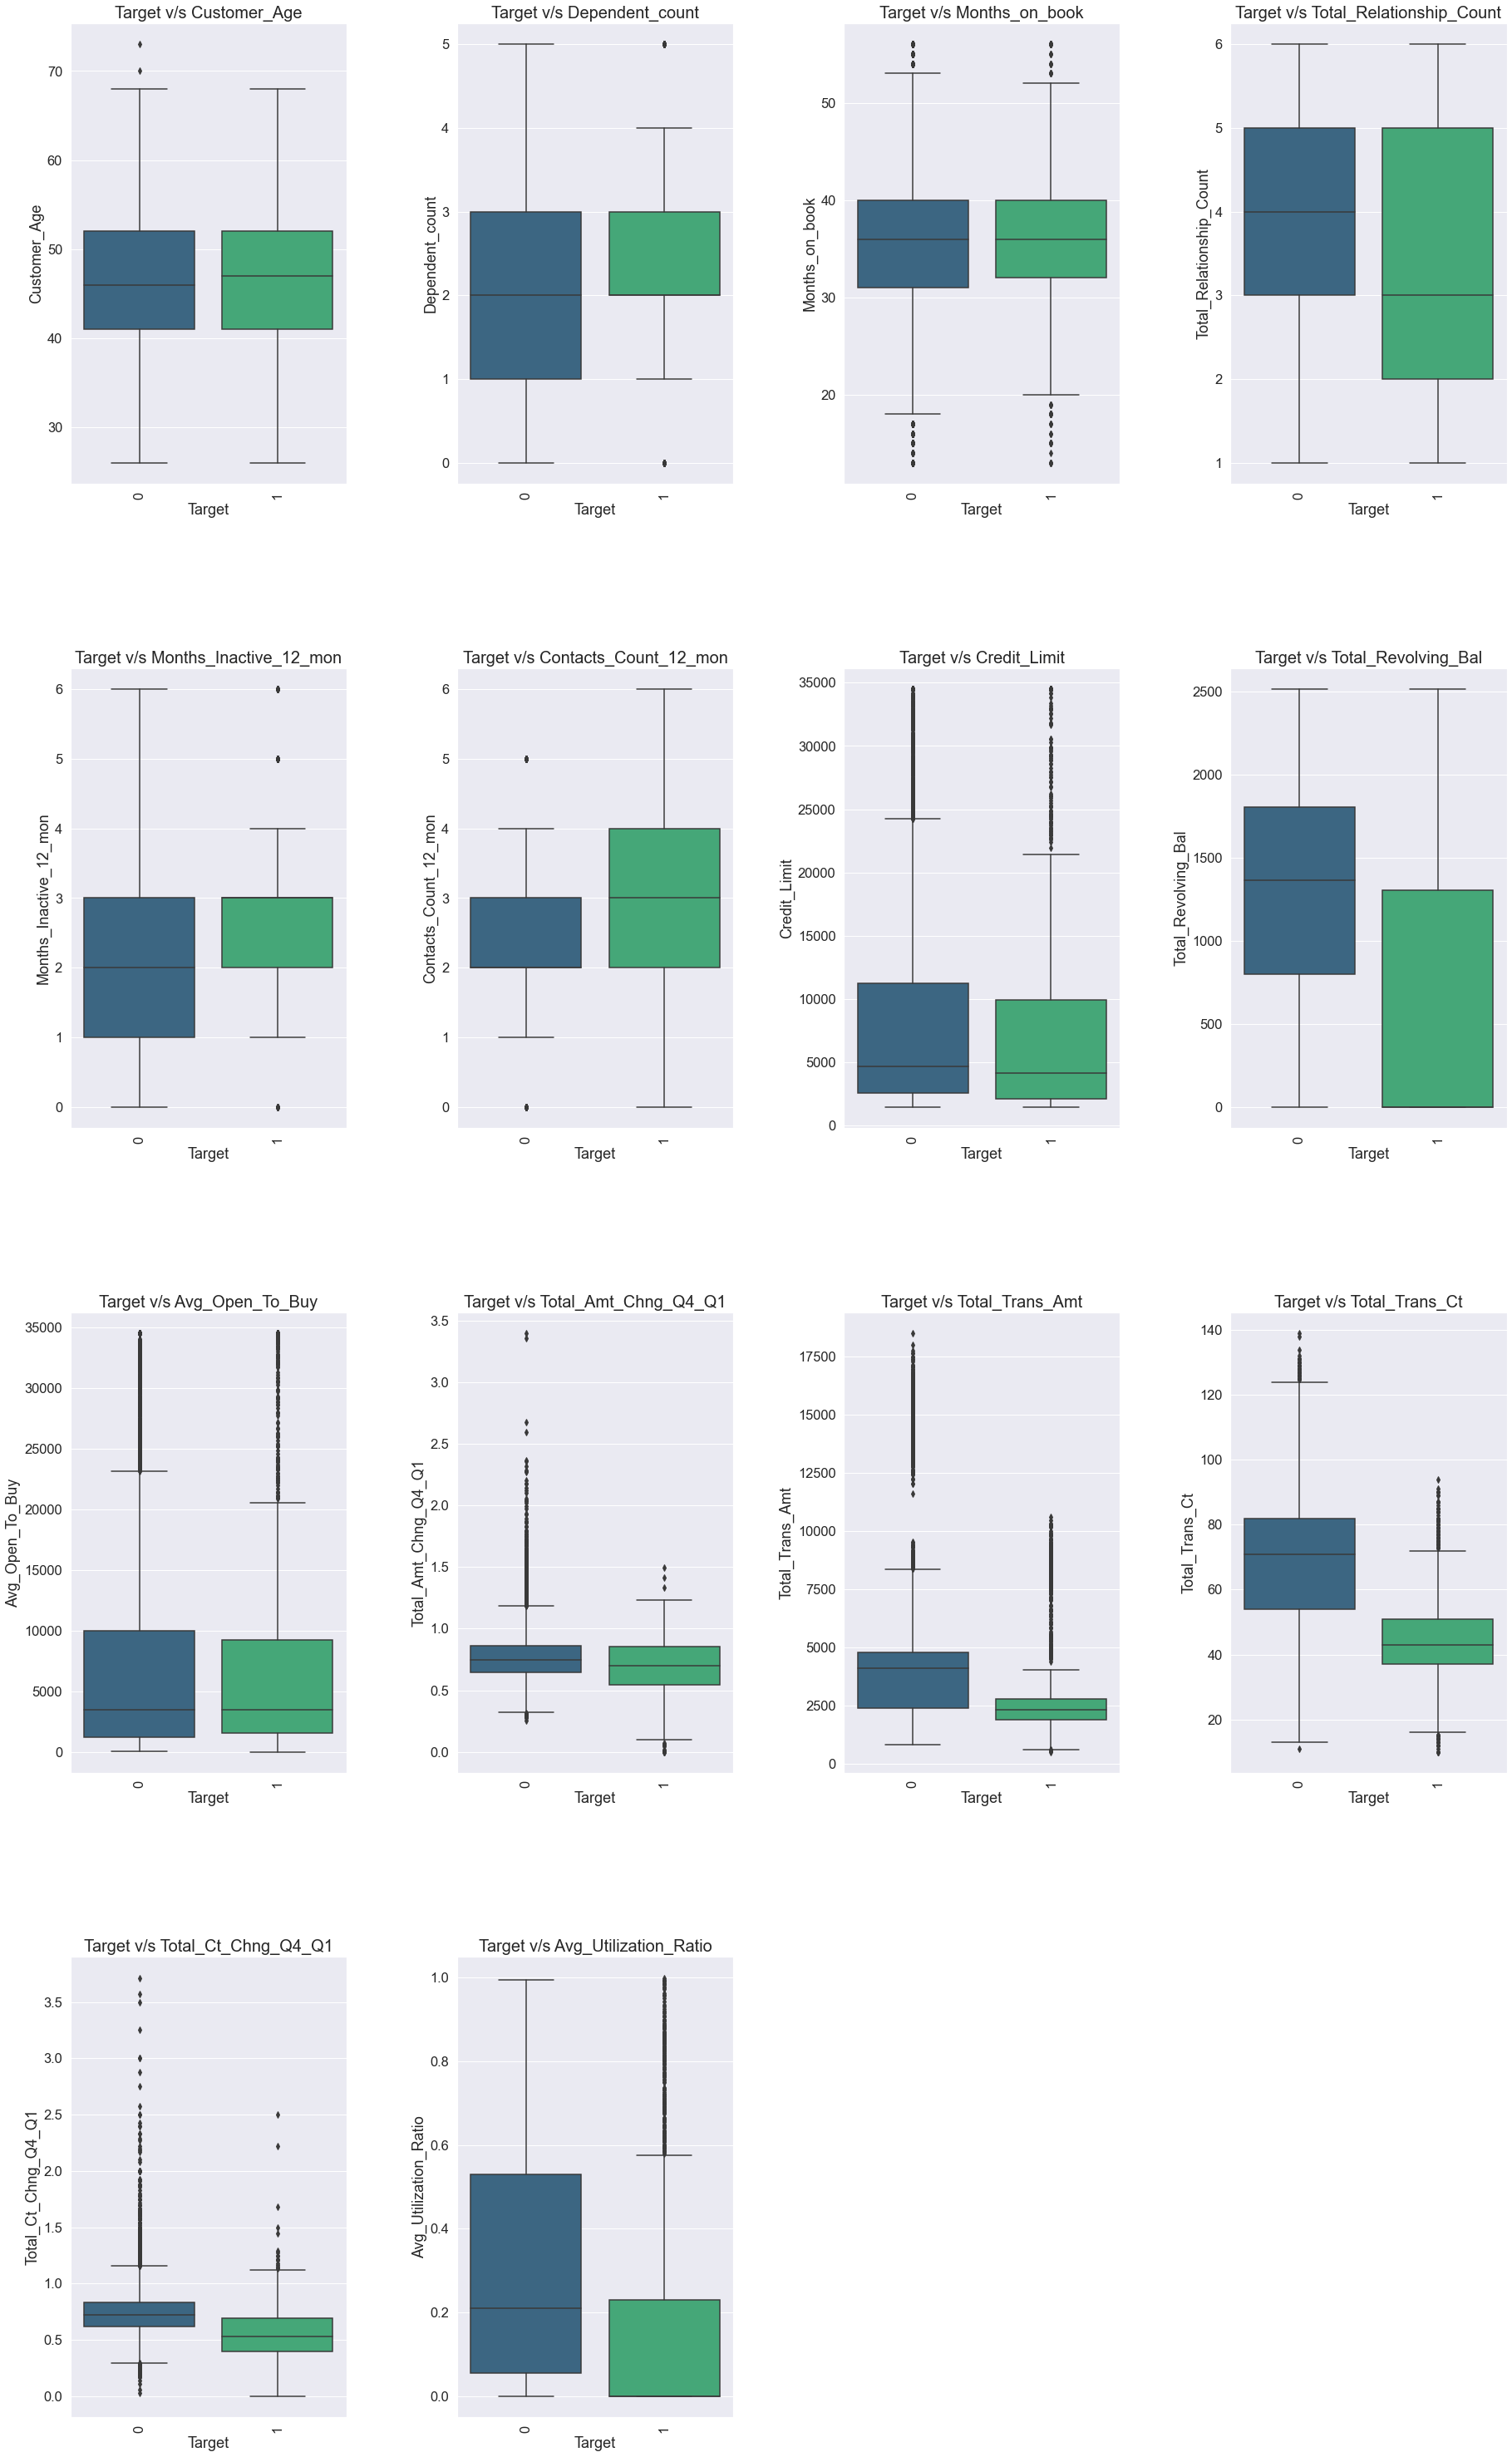

In [25]:
fig = plt.figure(figsize=(30,50))
sns.set(font_scale=1.5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(len(df_nums.columns)):
    plt.subplot(4,4, i + 1)
    ax=sns.boxplot(y=df_nums.columns[i], x='Target', data=df,palette = 'viridis')
    ax.set_title('Target v/s '+str(df_nums.columns[i]), fontsize=20)
    plt.xticks(rotation=90)
fig.show()

### Scatterplot for some numerical columns

Text(0.5, 1.0, 'Credit_Limit vs Avg_Utilization_Ratio')

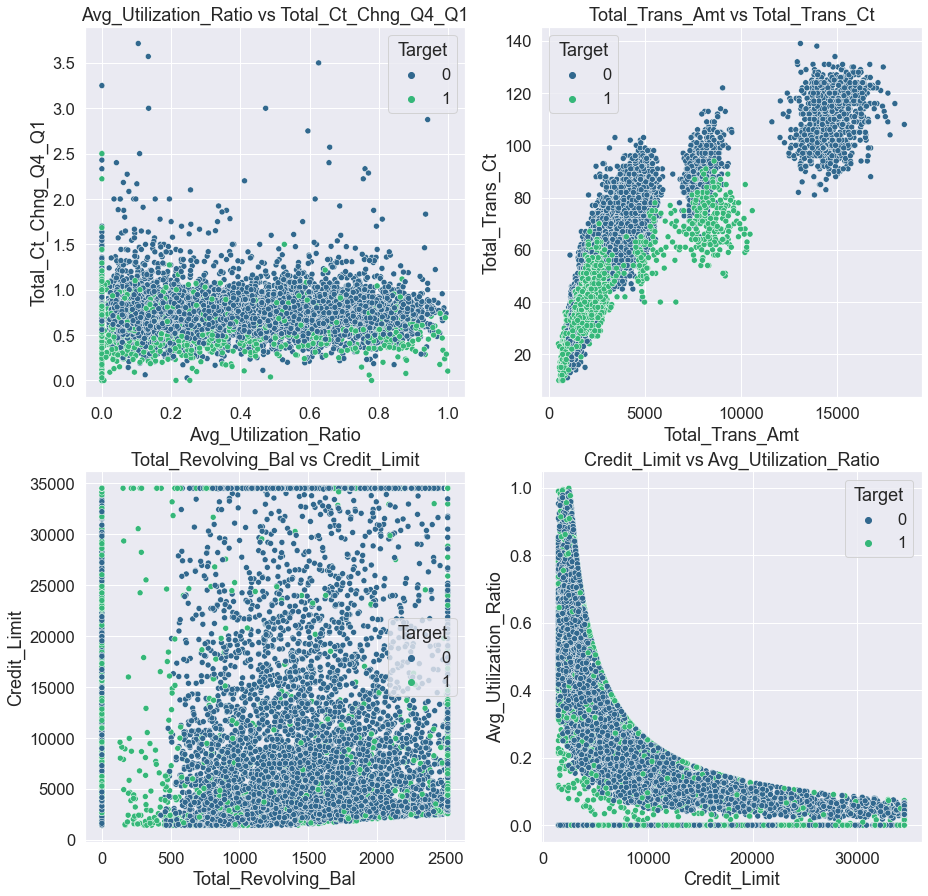

In [26]:
fig, ax =plt.subplots(2,2, figsize=(15, 15))
sns.scatterplot(data=df, x="Avg_Utilization_Ratio", y="Total_Ct_Chng_Q4_Q1", hue="Target",palette='viridis', ax=ax[0][0])

sns.scatterplot(data=df, x="Total_Trans_Amt", y="Total_Trans_Ct", hue="Target",palette='viridis', ax=ax[0][1])

sns.scatterplot(data=df, x="Total_Revolving_Bal", y="Credit_Limit", hue="Target",palette='viridis', ax=ax[1][0])

sns.scatterplot(data=df, x="Credit_Limit", y="Avg_Utilization_Ratio", hue="Target",palette='viridis', ax=ax[1][1])

ax[0, 0].set_title("Avg_Utilization_Ratio vs Total_Ct_Chng_Q4_Q1")

ax[0, 1].set_title("Total_Trans_Amt vs Total_Trans_Ct")

ax[1, 0].set_title("Total_Revolving_Bal vs Credit_Limit")

ax[1, 1].set_title("Credit_Limit vs Avg_Utilization_Ratio")

### Heatmap for Numerical columns

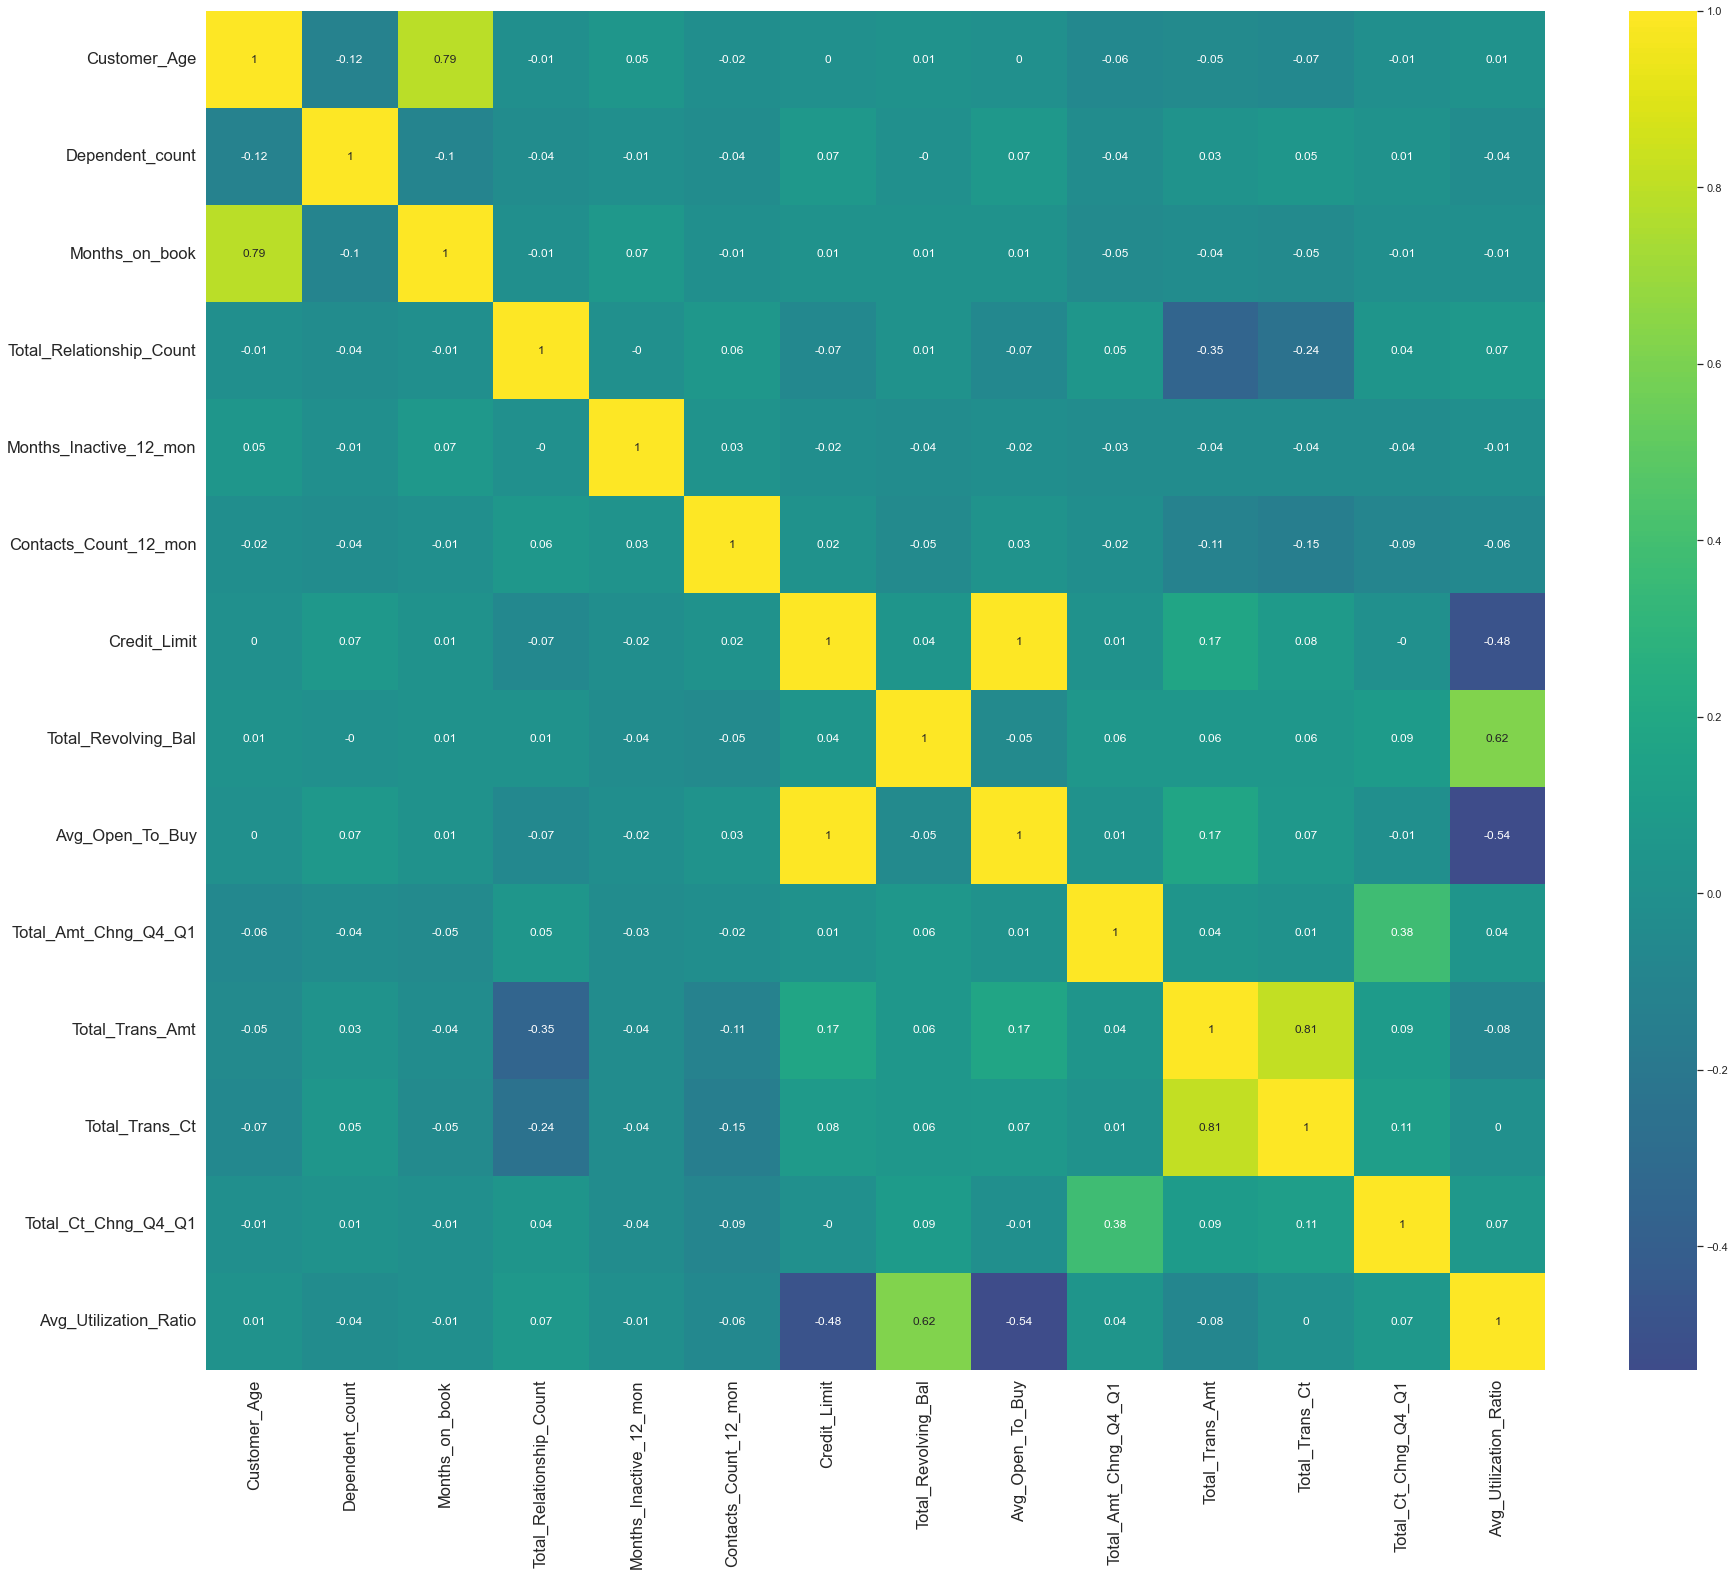

In [27]:
# Checking the correlation
plt.subplots(figsize = (30,25))
sns.set(font_scale=1)
#Plotting heatmap of numerical features
sns.heatmap(round(df[num_columns].corr(),2), cmap='viridis' , annot=True, center = 0)
plt.show()

### Observations from EDA:

- Attrition rate is more for individuals for whom 'Avg_Utilization_Ratio' is lesser.
- More attrition can be seen for individuals with less "Total_Trans_Ct".
- Attrition is more where "Total_Trans_Amt" is less.
- Attrition rate is seen more in Females.
- A higher attrition rate can be seen amongst graduates.
- Individuals with Salary less than $40K have higher attrition rate.
- There are not many outliers and hence we can proceed with the further steps.

# Feature Engineering

In [28]:
#getting dummies for categorical columns.
df_dummy = pd.get_dummies(df[object_columns], drop_first=True)

In [29]:
df = pd.concat([df, df_dummy], axis=1) #concatinating dummy columns with original dataframe
df.shape

(10127, 38)

In [30]:
df = df.drop(object_columns, axis = 1) #dropping the redundant object columns
df.shape

(10127, 33)

In [31]:
df.head()

Target  Customer_Age  Dependent_count  Months_on_book  \
0       0            45                3              39   
1       0            49                5              44   
2       0            51                3              36   
3       0            40                4              34   
4       0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      12691.00                  777         11914.00                  1.33   
1       8256.00                  864          7392.00                  1.54   
2       3418.00                    0          3418.00                  2.59   
3       3313.00                 2517           796.00                  1.41   
4       4716.00                    0          4716.00                  2.17   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                 1.62   
1             1291              33                 3.71   
2             1887              20                 2.33   
3             1171              20                 2.33   
4              816              28                 2.50   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0                   0.06         1                          0   
1                   0.10         0                          0   
2                   0.00         1                          0   
3                   0.76         0                          0   
4                   0.00         1                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Unknown  Income_Category_High  Income_Category_Low  \
0                       0                     0                    0   
1                       0                     0                    1   
2                       0                     1                    0   
3                       1                     0                    1   
4                       0                     0                    0   

   Income_Category_Medium  Income_Category_Unknown  Income_Category_Very High  \
0                       0                        0                          0   
1                       0                        0                          0   
2                       0                        0                 

# <center> <font color="Blue"> Model Building </center>

In [32]:
#Sepearating dependent & independent features
y=df["Target"]
X=df.drop("Target", axis=1)

In [33]:
X.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3      12691.00   
1                       1                      2       8256.00   
2                       1                      0       3418.00   
3                       4                      1       3313.00   
4                       1                      0       4716.00   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777         11914.00                  1.33   
1                  864          7392.00                  1.54   
2                    0          3418.00                  2.59   
3                 2517           796.00                  1.41   
4                    0          4716.00                  2.17   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                 1.62   
1             1291              33                 3.71   
2             1887              20                 2.33   
3             1171              20                 2.33   
4              816              28                 2.50   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0                   0.06         1                          0   
1                   0.10         0                          0   
2                   0.00         1                          0   
3                   0.76         0                          0   
4                   0.00         1                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Unknown  Income_Category_High  Income_Category_Low  \
0                       0                     0                    0   
1                       0                     0                    1   
2                       0                     1                    0   
3                       1                     0                    1   
4                       0                     0                    0   

   Income_Category_Medium  Income_Category_Unknown  Income_Category_Very High  \
0                       0                        0                          0   
1                       0                        0                          0   
2                       0                        0                          0   
3                       0         

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [35]:
scaler =StandardScaler()

In [36]:
X_train[num_columns]=scaler.fit_transform(X_train[num_columns])

In [37]:
X_test[num_columns]=scaler.fit_transform(X_test[num_columns])

# <center> <font color="Blue"> Logistic Regression Model </center>

In [38]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [39]:
rfe = RFE(log,15)
rfe = rfe.fit(X_train,y_train)
#List of top 15 features selected by RFE.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
cols = X_train_rfe.columns
X_train.columns[~rfe.support_]

Index(['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_Low', 'Income_Category_Medium',
       'Income_Category_Unknown', 'Card_Category_Silver'],
      dtype='object')

In [40]:
#Defining function to build  logistic model
def sm_model(X,y):
    X_train_sm = sm.add_constant(X)
    logm = sm.GLM(y, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    
    return res.summary()

In [41]:
#defining model to perform VIF
def vif_check(X,y):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Trial No. : 1

In [42]:
sm_model(X_train[cols],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7072
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1680.8
Date:                Sun, 06 Nov 2022   Deviance:                       3361.7
Time:                        20:42:56   Pearson chi2:                 7.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.4605      0.087    -28.397      0.000      -2.630      -2.291
Total_Relationship_Count         -0.6289      0.050    -12.537      0.000      -0.727      -0.531
Months_Inactive_12_mon            0.4866      0.045     10.787      0.000       0.398       0.575
Contacts_Count_12_mon             0.5721      0.048     11.942      0.000       0.478       0.666
Total_Revolving_Bal              -0.8073      0.045    -17.863      0.000      -0.896      -0.719
Total_Trans_Amt                   1.5575      0.091     17.207      0.000       1.380       1.735
Total_Trans_Ct                   -2.6563      0.101    -26.353      0.000      -2.854      -2.459
Total_Ct_Chng_Q4_Q1              -0.6755      0.051    -13.371      0.000      -0.774      -0.576
Gender_M                         -0.8924      0.115     -7.784      0.000      -1.117      -0.668
Education_Level_Doctorate         0.4036      0.205      1.969      0.049       0.002       0.805
Education_Level_Post-Graduate     0.2755      0.196      1.402      0.161      -0.110       0.661
Marital_Status_Married           -0.5324      0.092     -5.781      0.000      -0.713      -0.352
Income_Category_High              0.4425      0.145      3.042      0.002       0.157       0.728
Income_Category_Very High         0.6388      0.184      3.465      0.001       0.277       1.000
Card_Category_Gold                0.9618      0.363      2.647      0.008       0.250       1.674
Card_Category_Platinum            0.4000      0.818      0.489      0.625      -1.203       2.003
=================================================================================================
"""

In [43]:
vif_check(X_train[cols],y_train)

Features  VIF
4                 Total_Trans_Amt 3.12
5                  Total_Trans_Ct 2.95
7                        Gender_M 2.22
11           Income_Category_High 1.62
10         Marital_Status_Married 1.33
12      Income_Category_Very High 1.29
0        Total_Relationship_Count 1.15
9   Education_Level_Post-Graduate 1.04
2           Contacts_Count_12_mon 1.03
6             Total_Ct_Chng_Q4_Q1 1.03
8       Education_Level_Doctorate 1.03
13             Card_Category_Gold 1.03
3             Total_Revolving_Bal 1.02
1          Months_Inactive_12_mon 1.01
14         Card_Category_Platinum 1.01

#### Dropping the feature 'Card_Category_Platinum' with maximum p value.

In [44]:
cols = cols.drop('Card_Category_Platinum',1)

### Trial No. : 2

In [45]:
sm_model(X_train[cols],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7073
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1680.9
Date:                Sun, 06 Nov 2022   Deviance:                       3361.9
Time:                        20:42:57   Pearson chi2:                 7.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.4594      0.087    -28.396      0.000      -2.629      -2.290
Total_Relationship_Count         -0.6293      0.050    -12.545      0.000      -0.728      -0.531
Months_Inactive_12_mon            0.4864      0.045     10.784      0.000       0.398       0.575
Contacts_Count_12_mon             0.5724      0.048     11.950      0.000       0.479       0.666
Total_Revolving_Bal              -0.8074      0.045    -17.865      0.000      -0.896      -0.719
Total_Trans_Amt                   1.5581      0.090     17.220      0.000       1.381       1.735
Total_Trans_Ct                   -2.6561      0.101    -26.356      0.000      -2.854      -2.459
Total_Ct_Chng_Q4_Q1              -0.6757      0.051    -13.373      0.000      -0.775      -0.577
Gender_M                         -0.8930      0.115     -7.790      0.000      -1.118      -0.668
Education_Level_Doctorate         0.4061      0.205      1.983      0.047       0.005       0.807
Education_Level_Post-Graduate     0.2816      0.196      1.437      0.151      -0.103       0.666
Marital_Status_Married           -0.5325      0.092     -5.782      0.000      -0.713      -0.352
Income_Category_High              0.4424      0.145      3.041      0.002       0.157       0.727
Income_Category_Very High         0.6393      0.184      3.467      0.001       0.278       1.001
Card_Category_Gold                0.9599      0.363      2.642      0.008       0.248       1.672
=================================================================================================
"""

In [46]:
vif_check(X_train[cols],y_train)

Features  VIF
4                 Total_Trans_Amt 3.12
5                  Total_Trans_Ct 2.95
7                        Gender_M 2.22
11           Income_Category_High 1.62
10         Marital_Status_Married 1.33
12      Income_Category_Very High 1.29
0        Total_Relationship_Count 1.15
9   Education_Level_Post-Graduate 1.04
2           Contacts_Count_12_mon 1.03
6             Total_Ct_Chng_Q4_Q1 1.03
8       Education_Level_Doctorate 1.03
3             Total_Revolving_Bal 1.02
13             Card_Category_Gold 1.02
1          Months_Inactive_12_mon 1.01

#### Dropping the feature 'Education_Level_Post-Graduate' with maximum p value.

In [47]:
cols = cols.drop('Education_Level_Post-Graduate',1)

### Trial No. : 3

In [48]:
sm_model(X_train[cols],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7074
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.0
Date:                Sun, 06 Nov 2022   Deviance:                       3363.9
Time:                        20:42:57   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.4442      0.086    -28.480      0.000      -2.612      -2.276
Total_Relationship_Count     -0.6305      0.050    -12.570      0.000      -0.729      -0.532
Months_Inactive_12_mon        0.4850      0.045     10.762      0.000       0.397       0.573
Contacts_Count_12_mon         0.5718      0.048     11.942      0.000       0.478       0.666
Total_Revolving_Bal          -0.8066      0.045    -17.862      0.000      -0.895      -0.718
Total_Trans_Amt               1.5568      0.090     17.208      0.000       1.379       1.734
Total_Trans_Ct               -2.6554      0.101    -26.349      0.000      -2.853      -2.458
Total_Ct_Chng_Q4_Q1          -0.6773      0.051    -13.412      0.000      -0.776      -0.578
Gender_M                     -0.8875      0.114     -7.753      0.000      -1.112      -0.663
Education_Level_Doctorate     0.3900      0.204      1.908      0.056      -0.011       0.791
Marital_Status_Married       -0.5330      0.092     -5.789      0.000      -0.713      -0.353
Income_Category_High          0.4382      0.145      3.015      0.003       0.153       0.723
Income_Category_Very High     0.6288      0.184      3.413      0.001       0.268       0.990
Card_Category_Gold            0.9582      0.364      2.635      0.008       0.245       1.671
=============================================================================================
"""

In [49]:
vif_check(X_train[cols],y_train)

Features  VIF
4             Total_Trans_Amt 3.12
5              Total_Trans_Ct 2.94
7                    Gender_M 2.21
10       Income_Category_High 1.62
9      Marital_Status_Married 1.31
11  Income_Category_Very High 1.29
0    Total_Relationship_Count 1.15
2       Contacts_Count_12_mon 1.03
6         Total_Ct_Chng_Q4_Q1 1.03
8   Education_Level_Doctorate 1.03
3         Total_Revolving_Bal 1.02
12         Card_Category_Gold 1.02
1      Months_Inactive_12_mon 1.01

#### Dropping the feature 'Education_Level_Doctorate' with maximum p value.

In [50]:
cols = cols.drop('Education_Level_Doctorate',1)

#### Trial No. : 4

In [51]:
sm_model(X_train[cols],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7075
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1683.7
Date:                Sun, 06 Nov 2022   Deviance:                       3367.5
Time:                        20:42:57   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.4263      0.085    -28.516      0.000      -2.593      -2.260
Total_Relationship_Count     -0.6324      0.050    -12.613      0.000      -0.731      -0.534
Months_Inactive_12_mon        0.4850      0.045     10.765      0.000       0.397       0.573
Contacts_Count_12_mon         0.5724      0.048     11.960      0.000       0.479       0.666
Total_Revolving_Bal          -0.8070      0.045    -17.884      0.000      -0.895      -0.719
Total_Trans_Amt               1.5529      0.090     17.176      0.000       1.376       1.730
Total_Trans_Ct               -2.6528      0.101    -26.344      0.000      -2.850      -2.455
Total_Ct_Chng_Q4_Q1          -0.6803      0.050    -13.482      0.000      -0.779      -0.581
Gender_M                     -0.8906      0.114     -7.781      0.000      -1.115      -0.666
Marital_Status_Married       -0.5295      0.092     -5.756      0.000      -0.710      -0.349
Income_Category_High          0.4394      0.145      3.028      0.002       0.155       0.724
Income_Category_Very High     0.6260      0.184      3.398      0.001       0.265       0.987
Card_Category_Gold            0.9545      0.365      2.619      0.009       0.240       1.669
=============================================================================================
"""

In [52]:
vif_check(X_train[cols],y_train)

Features  VIF
4             Total_Trans_Amt 3.12
5              Total_Trans_Ct 2.94
7                    Gender_M 2.20
9        Income_Category_High 1.62
8      Marital_Status_Married 1.30
10  Income_Category_Very High 1.29
0    Total_Relationship_Count 1.15
2       Contacts_Count_12_mon 1.03
6         Total_Ct_Chng_Q4_Q1 1.03
3         Total_Revolving_Bal 1.02
11         Card_Category_Gold 1.02
1      Months_Inactive_12_mon 1.01

#### All the models have acceptable p-value. The VIF values are also less than 5. Thus we can consider all the remaining features to be statistically important.

### Creating the final Model

In [53]:
X_train_sm = sm.add_constant(X_train[cols])
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7075
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1683.7
Date:                Sun, 06 Nov 2022   Deviance:                       3367.5
Time:                        20:42:58   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.4263      0.085    -28.516      0.000      -2.593      -2.260
Total_Relationship_Count     -0.6324      0.050    -12.613      0.000      -0.731      -0.534
Months_Inactive_12_mon        0.4850      0.045     10.765      0.000       0.397       0.573
Contacts_Count_12_mon         0.5724      0.048     11.960      0.000       0.479       0.666
Total_Revolving_Bal          -0.8070      0.045    -17.884      0.000      -0.895      -0.719
Total_Trans_Amt               1.5529      0.090     17.176      0.000       1.376       1.730
Total_Trans_Ct               -2.6528      0.101    -26.344      0.000      -2.850      -2.455
Total_Ct_Chng_Q4_Q1          -0.6803      0.050    -13.482      0.000      -0.779      -0.581
Gender_M                     -0.8906      0.114     -7.781      0.000      -1.115      -0.666
Marital_Status_Married       -0.5295      0.092     -5.756      0.000      -0.710      -0.349
Income_Category_High          0.4394      0.145      3.028      0.002       0.155       0.724
Income_Category_Very High     0.6260      0.184      3.398      0.001       0.265       0.987
Card_Category_Gold            0.9545      0.365      2.619      0.009       0.240       1.669
=============================================================================================
"""

In [54]:
#Predicting on X_train
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7347   0.02
3862   0.04
2511   0.95
1046   0.95
4564   0.00
6494   0.01
8487   0.01
5708   0.01
143    0.86
3795   0.74
dtype: float64

In [55]:
#Creating a consolidated y_train_pred_final 
y_train_pred_final = pd.DataFrame({'Target':y_train.values, 'Target_Prob':y_train_pred})
y_train_pred_final.head()

Target  Target_Prob
7347       0         0.02
3862       0         0.04
2511       1         0.95
1046       1         0.95
4564       0         0.00

In [56]:
#Here we are taking a arbitrary cut-off of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Target_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Target  Target_Prob  Predicted
7347       0         0.02          0
3862       0         0.04          0
2511       1         0.95          1
1046       1         0.95          1
4564       0         0.00          0

In [58]:
# Creating confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.Predicted )
confusion

array([[5758,  205],
       [ 482,  643]], dtype=int64)

In [59]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.Predicted)

0.9030756207674944

In [60]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [61]:
#Sensitivity:

TP/(TP+FN)

0.5715555555555556

In [62]:
#Specificity

# Calculating the 
TN/(TN+FP)

0.9656213315445246

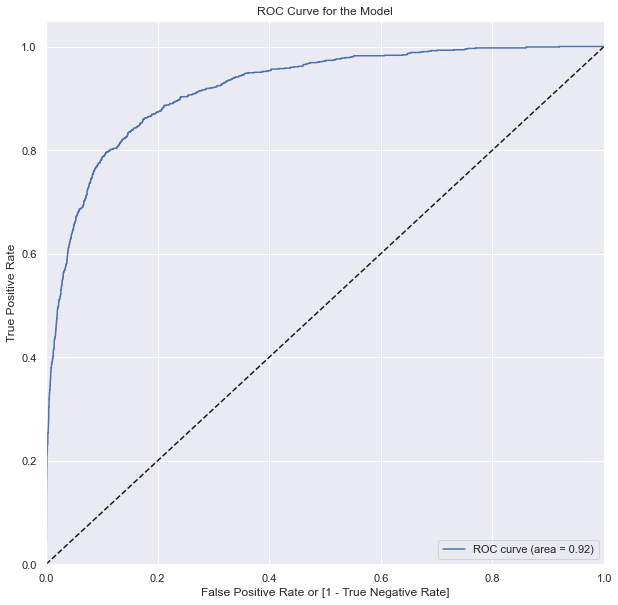

In [63]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for the Model')
    plt.legend(loc="lower right")
    plt.show()

    return None

#Calling the ROC function
draw_roc(y_train_pred_final.Target, y_train_pred_final.Target_Prob)

In [64]:
# Creating columns to check the Predicted Values with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Target_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Target  Target_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
7347       0         0.02          0    1    0    0    0    0    0    0    0   
3862       0         0.04          0    1    0    0    0    0    0    0    0   
2511       1         0.95          1    1    1    1    1    1    1    1    1   
1046       1         0.95          1    1    1    1    1    1    1    1    1   
4564       0         0.00          0    1    0    0    0    0    0    0    0   

      0.8  0.9  
7347    0    0  
3862    0    0  
2511    1    1  
1046    1    1  
4564    0    0

In [65]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

probability  accuracy  sensitivity  specificity
0.00         0.00      0.16         1.00         0.00
0.10         0.10      0.80         0.89         0.78
0.20         0.20      0.86         0.80         0.88
0.30         0.30      0.89         0.74         0.92
0.40         0.40      0.90         0.66         0.95
0.50         0.50      0.90         0.57         0.97
0.60         0.60      0.90         0.49         0.98
0.70         0.70      0.89         0.41         0.99
0.80         0.80      0.89         0.32         0.99
0.90         0.90      0.87         0.17         1.00

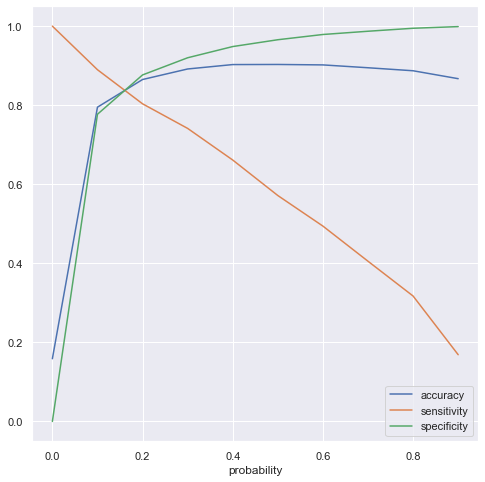

In [66]:
# Plotting the accuracy, sensitivity and specificity
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(8,8))
plt.show()

In [67]:
#From the above curve we can consider 0.15 as the cut-off point

y_train_pred_final['final_predicted'] = y_train_pred_final.Target_Prob.map( lambda x: 1 if x > 0.15 else 0)
y_train_pred_final.head()

Target  Target_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
7347       0         0.02          0    1    0    0    0    0    0    0    0   
3862       0         0.04          0    1    0    0    0    0    0    0    0   
2511       1         0.95          1    1    1    1    1    1    1    1    1   
1046       1         0.95          1    1    1    1    1    1    1    1    1   
4564       0         0.00          0    1    0    0    0    0    0    0    0   

      0.8  0.9  final_predicted  
7347    0    0                0  
3862    0    0                0  
2511    1    1                1  
1046    1    1                1  
4564    0    0                0

In [68]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.final_predicted)

0.840293453724605

In [69]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.final_predicted )
confusion2

array([[5008,  955],
       [ 177,  948]], dtype=int64)

In [70]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [71]:
# Calculating the sensitivity
TP/(TP+FN)

0.8426666666666667

In [72]:
# Calculating the specificity
TN/(TN+FP)

0.8398457152440046

In [73]:
#Prediction on Test set

X_test=X_test[cols]

In [74]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

const  Total_Relationship_Count  Months_Inactive_12_mon  \
5457    1.00                      0.11                   -0.34   
10012   1.00                     -0.53                    0.68   
9609    1.00                     -1.81                    0.68   
381     1.00                      1.39                   -0.34   
7880    1.00                     -1.81                   -0.34   
...      ...                       ...                     ...   
6308    1.00                     -0.53                   -1.36   
4853    1.00                     -0.53                    0.68   
311     1.00                     -0.53                   -0.34   
552     1.00                      0.11                   -0.34   
8804    1.00                     -1.17                    0.68   

       Contacts_Count_12_mon  Total_Revolving_Bal  Total_Trans_Amt  \
5457                   -0.43                -1.44             0.02   
10012                  -0.43                 0.75             3.21   
9609                   -2.24                -0.57             2.61   
381                     0.48                 0.82            -0.86   
7880                    0.48                -1.44            -0.07   
...                      ...                  ...              ...   
6308                    0.48                 0.40             0.01   
4853                    1.38                 0.59             0.05   
311                    -2.24                -0.14            -0.89   
552                     1.38                -0.19            -0.93   
8804                    0.48                 0.52             1.03   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Gender_M  Marital_Status_Married  \
5457             0.14                -0.23         1                       0   
10012            2.54                 0.05         1                       1   
9609             1.12                 0.32         1                       1   
381             -1.19                 2.03         1                       1   
7880             0.70                 0.75         1                       1   
...               ...                  ...       ...                     ...   
6308             0.44                -0.36         0                       0   
4853             0.74                 1.26         0                       0   
311             -1.36                 2.13         1                       1   
552             -1.27                -0.53         1                       1   
8804             0.95                -1.14         1                       0   

       Income_Category_High  Income_Category_Very High  Card_Category_Gold  
5457                      0                          0                   0  
10012                     1                          0                   0  
9609                      0                          0                   0  
381                       1                          0                   0  
7880                      0                          0                   0  
...                     ...                        ...                 ...  
6308                      0                          0                   0  
4853                      0                          0                   0  
311                       0                          0                   0  
552                       0                          0                   0  
8804                      1                          0                   0  

[3039 rows x 13 columns]

In [75]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)


In [76]:
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

In [77]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [78]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [79]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Target_Prob'})
y_pred_final.head()

Target  Target_Prob
0       0         0.06
1       0         0.00
2       0         0.09
3       0         0.01
4       0         0.02

In [80]:
# Making prediction using cut off 0.60
y_pred_final['final_predicted'] = y_pred_final.Target_Prob.map(lambda x: 1 if x > 0.15 else 0)
y_pred_final

Target  Target_Prob  final_predicted
0          0         0.06                0
1          0         0.00                0
2          0         0.09                0
3          0         0.01                0
4          0         0.02                0
...      ...          ...              ...
3034       0         0.02                0
3035       0         0.02                0
3036       0         0.02                0
3037       0         0.30                1
3038       0         0.11                0

[3039 rows x 3 columns]

In [81]:
#Accuracy:

# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Target'], y_pred_final.final_predicted)

0.8433695294504772

In [82]:
#Creating Confusion Matrix:

confusion2 = metrics.confusion_matrix(y_pred_final['Target'], y_pred_final.final_predicted )
confusion2

array([[2125,  412],
       [  64,  438]], dtype=int64)

In [83]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [84]:
#Sensitivity:

# Calculating the sensitivity
TP/(TP+FN)

0.8725099601593626

In [85]:
#Specificity:

# Calculating the specificity
TN/(TN+FP)

0.8376034686637761

In [86]:
#Precision-Recall
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.Predicted )
confusion

array([[5758,  205],
       [ 482,  643]], dtype=int64)

In [87]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7582547169811321

In [88]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5715555555555556

In [89]:
#Precision and recall tradeoff

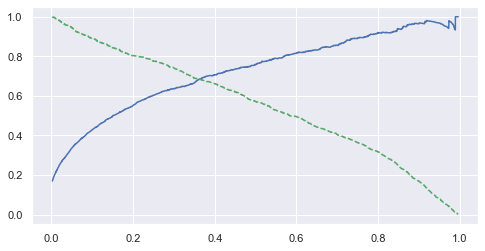

In [90]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Target, y_train_pred_final.Target_Prob)
plt.figure(figsize=(8,4))
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g--")
plt.show()

In [91]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Target_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Target  Target_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
7347       0         0.02          0    1    0    0    0    0    0    0    0   
3862       0         0.04          0    1    0    0    0    0    0    0    0   
2511       1         0.95          1    1    1    1    1    1    1    1    1   
1046       1         0.95          1    1    1    1    1    1    1    1    1   
4564       0         0.00          0    1    0    0    0    0    0    0    0   

      0.8  0.9  final_predicted  
7347    0    0                0  
3862    0    0                0  
2511    1    1                1  
1046    1    1                1  
4564    0    0                0

In [92]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.final_predicted)

0.8954571106094809

In [93]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.final_predicted )
confusion2

array([[5572,  391],
       [ 350,  775]], dtype=int64)

In [94]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [95]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6646655231560892

In [96]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6888888888888889

In [97]:
#Prediction on Test set
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Target_Prob','target':'Target'})
y_pred_final.head()

Target  Target_Prob
0       0         0.06
1       0         0.00
2       0         0.09
3       0         0.01
4       0         0.02

In [98]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Target_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

Target  Target_Prob  final_predicted
0       0         0.06                0
1       0         0.00                0
2       0         0.09                0
3       0         0.01                0
4       0         0.02                0

In [99]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Target'], y_pred_final.final_predicted)

0.9006252056597565

In [100]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Target'], y_pred_final.final_predicted )
confusion2

array([[2380,  157],
       [ 145,  357]], dtype=int64)

In [101]:
print(classification_report(y_pred_final['Target'], y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2537
           1       0.69      0.71      0.70       502

    accuracy                           0.90      3039
   macro avg       0.82      0.82      0.82      3039
weighted avg       0.90      0.90      0.90      3039



## <font color="Green">Logistic Model Performance Metrics:

### Accuracy: 0.90
### Precision : 0.69 i.e., Out of all attriition cases that model predicted only 69% were actual attritions.
### Recall       : 0.71 i.e., Out of all the actual attrition cases, the model predicted 71% correctly.


# <center> <font color="Blue"> KNN Classification Model </center>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [103]:
X_train[num_columns]=scaler.fit_transform(X_train[num_columns])
X_test[num_columns]=scaler.fit_transform(X_test[num_columns])

In [104]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search_knn=grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [105]:
grid_search_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [106]:
grid_search_knn.cv_results_['mean_test_score']

array([0.89164756, 0.89305989, 0.90589855, 0.90081969, 0.9092837 ,
       0.90251221, 0.90843784, 0.90166595, 0.90660407, 0.90166585,
       0.90632129, 0.90265345, 0.90688576, 0.90307639, 0.90561627,
       0.90194814, 0.90519294, 0.90124192, 0.90575691, 0.90152461,
       0.90406419, 0.90194754, 0.9027942 , 0.90222933, 0.90335788,
       0.90124152, 0.90251151, 0.89940766, 0.90194674, 0.90039516])

Text(0, 0.5, 'Accuracy')

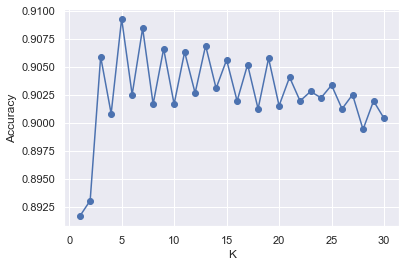

In [107]:
scores = grid_search_knn.cv_results_['mean_test_score']
plt.plot(k_range,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [108]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [109]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
pred = knn_model.predict(X_test)

In [111]:
confusion_matrix(y_test,pred)

array([[2475,   62],
       [ 217,  285]], dtype=int64)

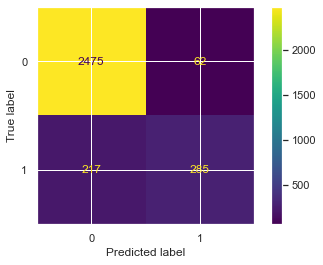

In [112]:
plot_confusion_matrix(knn_model,X_test,y_test)

In [113]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2537
           1       0.82      0.57      0.67       502

    accuracy                           0.91      3039
   macro avg       0.87      0.77      0.81      3039
weighted avg       0.90      0.91      0.90      3039



## <font color="Green">KNN Classification Model Performance Metrics:

### Accuracy : 0.91
### Precision : 0.82 i.e., Out of all attrition cases that model predicted only 82% were actual attritions.
### Recall       : 0.57 i.e., Out of all the actual attrition cases, the model predicted 57% correctly.


# <center> <font color="Blue"> SVC Model </center>

In [114]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [115]:
#selecting SVC Modle types
models = ["linear", "poly", "rbf"]

In [116]:
X_train[num_columns]=scaler.fit_transform(X_train[num_columns])
X_test[num_columns]=scaler.fit_transform(X_test[num_columns])

In [117]:
for i in models:
    print(f"===============Model type: {i}================")
    model=SVC(kernel=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
    print(metrics.classification_report(y_test, y_pred, digits=3))
    print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

===============Model type: linear================
accuracy: 0.9055610398157289 

              precision    recall  f1-score   support

           0      0.920     0.971     0.945      2537
           1      0.796     0.576     0.668       502

    accuracy                          0.906      3039
   macro avg      0.858     0.773     0.807      3039
weighted avg      0.900     0.906     0.899      3039

[[2463   74]
 [ 213  289]]
===============Model type: poly================
accuracy: 0.926949654491609 

              precision    recall  f1-score   support

           0      0.936     0.980     0.957      2537
           1      0.865     0.661     0.749       502

    accuracy                          0.927      3039
   macro avg      0.900     0.820     0.853      3039
weighted avg      0.924     0.927     0.923      3039

[[2485   52]
 [ 170  332]]
===============Model type: rbf================
accuracy: 0.9368213228035538 

              precision    recall  f1-score   support



#### As seen from above, the RBF gives the highest accuracy. Let's explore it's hyperparameters further.

In [118]:
#Grid Model for Hyperparameter Tuning
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

In [119]:
# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [120]:
# specify model
svc = SVC(kernel="rbf")

In [121]:
# set up GridSearchCV()
svc_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [122]:
# fit the model
svc_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [123]:
# cv results
cv_results = pd.DataFrame(svc_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0            1.23          0.13             0.52            0.06       1   
1            1.29          0.05             0.58            0.01       1   
2            1.27          0.05             0.62            0.01       1   
3            1.02          0.03             0.40            0.01      10   
4            1.11          0.04             0.48            0.04      10   
5            1.25          0.04             0.60            0.06      10   
6            1.73          0.08             0.35            0.04     100   
7            1.26          0.05             0.43            0.02     100   
8            1.09          0.03             0.51            0.04     100   
9            4.82          0.21             0.33            0.02    1000   
10           2.20          0.05             0.40            0.02    1000   
11           1.26          0.07             0.44            0.03    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}               0.91   
1         0.00      {'C': 1, 'gamma': 0.001}               0.88   
2         0.00     {'C': 1, 'gamma': 0.0001}               0.84   
3         0.01      {'C': 10, 'gamma': 0.01}               0.92   
4         0.00     {'C': 10, 'gamma': 0.001}               0.90   
5         0.00    {'C': 10, 'gamma': 0.0001}               0.88   
6         0.01     {'C': 100, 'gamma': 0.01}               0.93   
7         0.00    {'C': 100, 'gamma': 0.001}               0.91   
8         0.00   {'C': 100, 'gamma': 0.0001}               0.90   
9         0.01    {'C': 1000, 'gamma': 0.01}               0.92   
10        0.00   {'C': 1000, 'gamma': 0.001}               0.92   
11        0.00  {'C': 1000, 'gamma': 0.0001}               0.90   

    split1_test_score  split2_test_score  split3_test_score  \
0                0.91               0.91               0.91   
1                0.88               0.89               0.90   
2                0.83               0.85               0.84   
3                0.93               0.94               0.93   
4                0.90               0.90               0.90   
5                0.88               0.89               0.90   
6                0.94               0.93               0.93   
7                0.91               0.92               0.92   
8                0.90               0.90               0.90   
9                0.93               0.92               0.92   
10               0.93               0.94               0.92   
11               0.90               0.91               0.91   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0                0.92             0.91            0.01                6   
1                0.90             0.89            0.01               11   
2                0.84             0.84            0.01               12   
3                0.94             0.93            0.01                2   
4                0.91             0.90            0.00                8   
5                0.90             0.89            0.01               10   
6                0.94             0.93            0.01                1   
7                0.93             0.92            0.01                5   
8                0.91             0.90            0.00                9   
9                0.93             0.93            0.00                4   
10               0.94             0.93            0.01                3   
11               0.92             0.91            0.01                7   

    split0_train_score  split1_train_score  split2_train_score  \
0                 0.92                0.91                0.91   
1                 0.89                0.90                0.89   
2                 0.84                0.84                0.84   
3                 0.94                0.94                0.94   
4                

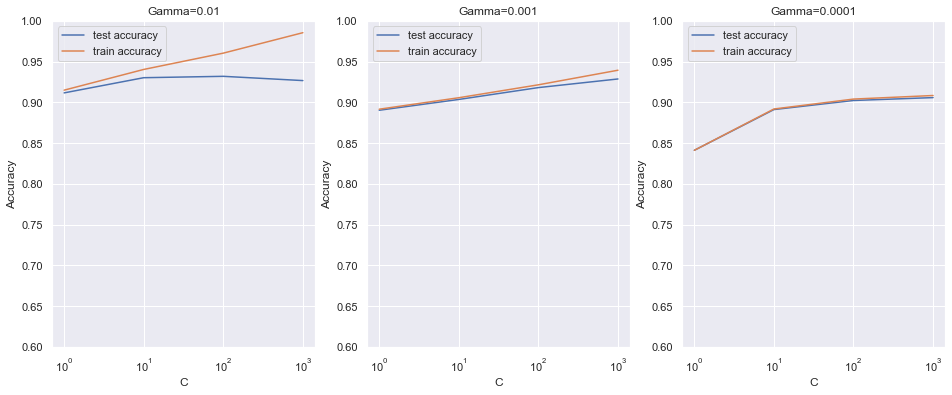

In [124]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

#plotting
plt.figure(figsize=(16,6))
sns.set(font_scale=1)

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [125]:
# printing the optimal accuracy score and hyperparameters
best_score = svc_cv.best_score_
best_hyperparams = svc_cv.best_params_

print(f"The best test score is {best_score} corresponding to hyperparameters {best_hyperparams}")

The best test score is 0.9319980132443739 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [126]:
#Building and Evaluating the final model
# model with optimal hyperparameters

# model
model_svc = SVC(C=100, gamma=0.01, kernel="rbf")

model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

In [127]:
# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.9391247120763409 



In [128]:
SVC_Accuracy = metrics.accuracy_score(y_test, y_pred)
SVC_Accuracy

0.9391247120763409

In [129]:
print(metrics.confusion_matrix(y_test, y_pred), "\n")

[[2467   70]
 [ 115  387]] 



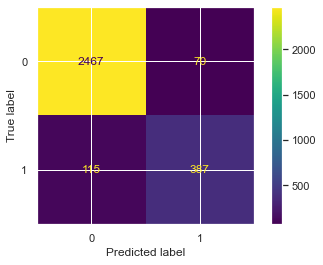

In [130]:
plot_confusion_matrix(model_svc,X_test,y_test)

In [131]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.955     0.972     0.964      2537
           1      0.847     0.771     0.807       502

    accuracy                          0.939      3039
   macro avg      0.901     0.872     0.885      3039
weighted avg      0.938     0.939     0.938      3039



## <font color="Green">Support Vector Classification Model Performance Metrics:

### Accuracy : 0.939
### Precision : 0.847 i.e., Out of all attrtiton cases that model predicted only 84.7% were actual attritions.
### Recall : 0.771 i.e., Out of all the actual attrition cases, the model predicted 77.1% correctly.

# <center> <font color="Blue">Gaussian Naive Bayes </center>

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [133]:
#creating Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [134]:
y_pred=nb.predict(X_test)

In [135]:
NB_Accuracy = metrics.accuracy_score(y_test, y_pred)
NB_Accuracy

0.8914116485686081

In [136]:
print(metrics.confusion_matrix(y_test, y_pred), "\n")

[[2408  129]
 [ 201  301]] 



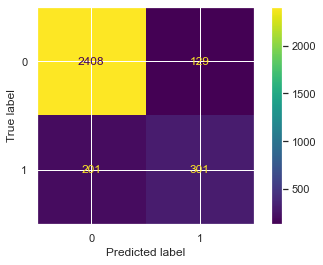

In [137]:
plot_confusion_matrix(nb,X_test,y_test)

In [138]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.923     0.949     0.936      2537
           1      0.700     0.600     0.646       502

    accuracy                          0.891      3039
   macro avg      0.811     0.774     0.791      3039
weighted avg      0.886     0.891     0.888      3039



## <font color="Green">Support Vector Classification Model Performance Metrics:

### Accuracy : 0.891
### Precision : 0.700 i.e., Out of all attrition cases that model predicted only 70% were actual attritions.
### Recall : 0.600 i.e., Out of all the actual attrition cases, the model predicted 60% correctly.

# <center> <font color="Blue">Decision Tree Classification Model </center>

In [139]:
#creating decision tree model
dt = DecisionTreeClassifier(random_state=101)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [141]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [142]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [143]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [144]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.05          0.01             0.01            0.00   
1           0.05          0.01             0.01            0.00   
2           0.04          0.00             0.01            0.00   
3           0.05          0.01             0.01            0.00   
4           0.05          0.01             0.01            0.00   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...               0.89   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...               0.89   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...               0.89   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...               0.89   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...               0.89   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0               0.90               0.89               0.90             0.89   
1               0.90               0.89               0.90             0.89   
2               0.90               0.89               0.90             0.89   
3               0.90               0.89               0.90             0.89   
4               0.90               0.89               0.90             0.89   

   std_test_score  rank_test_score  
0            0.00               41  
1            0.00               41  
2            0.00               41  
3            0.00               41  
4            0.00               41

In [145]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15           0.13          0.01             0.01            0.00   
20           0.13          0.00             0.01            0.00   
47           0.13          0.00             0.01            0.00   
42           0.13          0.01             0.01            0.00   
41           0.13          0.00             0.01            0.00   

   param_criterion param_max_depth param_min_samples_leaf  \
15            gini              10                      5   
20            gini              20                      5   
47         entropy              20                     20   
42         entropy              10                     20   
41         entropy              10                     10   

                                               params  split0_test_score  \
15  {'criterion': 'gini', 'max_depth': 10, 'min_sa...               0.94   
20  {'criterion': 'gini', 'max_depth': 20, 'min_sa...               0.94   
47  {'criterion': 'entropy', 'max_depth': 20, 'min...               0.94   
42  {'criterion': 'entropy', 'max_depth': 10, 'min...               0.94   
41  {'criterion': 'entropy', 'max_depth': 10, 'min...               0.94   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
15               0.93               0.95               0.94             0.94   
20               0.93               0.94               0.94             0.94   
47               0.94               0.93               0.95             0.94   
42               0.94               0.93               0.95             0.94   
41               0.94               0.94               0.94             0.94   

    std_test_score  rank_test_score  
15            0.01                1  
20            0.00                2  
47            0.00                2  
42            0.00                4  
41            0.00                5

In [146]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=101)

In [147]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=101)

In [148]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=101)

In [149]:
y_pred = dtree.predict(X_test)

In [150]:
print(metrics.confusion_matrix(y_test, y_pred), "\n")

[[2463   74]
 [ 102  400]] 



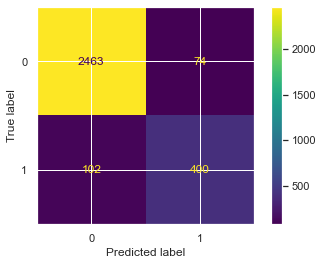

In [151]:
plot_confusion_matrix(dtree,X_test,y_test)

In [152]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.960     0.971     0.966      2537
           1      0.844     0.797     0.820       502

    accuracy                          0.942      3039
   macro avg      0.902     0.884     0.893      3039
weighted avg      0.941     0.942     0.941      3039



## <font color="Green">Decision Tree Classification Model Performance Metrics:

### Accuracy : 0.942
### Precision : 0.844 i.e., Out of all attrition cases that model predicted only 84.4% were actual attritions.
### Recall : 0.797 i.e., Out of all the actual attrition cases, the model predicted 79.7% correctly.

# <center> <font color="Blue">Random Forest Classification Model </center>

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [154]:
#creating Random Forest instance
rf = RandomForestClassifier(random_state=101, n_jobs=-1)

In [155]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [156]:
rf_grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [157]:
rf_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [158]:
rf_grid_search.best_score_

0.9456871554264401

In [159]:
rf_best = rf_grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=101)

In [160]:
rf_model=RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1, random_state=101)


In [161]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=101)

In [162]:
predictions = rf_model.predict(X_test)

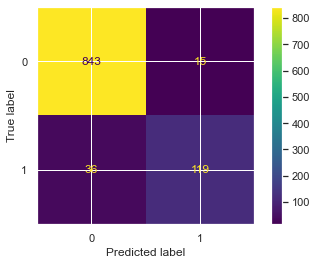

In [163]:
plot_confusion_matrix(rf_model,X_test,y_test)

In [164]:
rf_report = metrics.classification_report(y_test, predictions, digits=3)

In [165]:
print(rf_report)

              precision    recall  f1-score   support

           0      0.959     0.983     0.971       858
           1      0.888     0.768     0.824       155

    accuracy                          0.950      1013
   macro avg      0.924     0.875     0.897      1013
weighted avg      0.948     0.950     0.948      1013



## <font color="Green">Random Forest Classification Model Performance Metrics:

### Accuracy : 0.95
### Precision : 0.888 i.e., Out of all attrition cases that model predicted only 88.8% were actual attritions.
### Recall : 0.768 i.e., Out of all the actual attrition cases, the model predicted 76.8% correctly.

### <font color ='Blue'> So from above considerations, it can be seen that Random Forest Model gives the highest accuracy for this business case.

### Let's explore the features of importance as selected by Random Forest Model

In [166]:
rf_model.feature_importances_

array([2.49075377e-02, 7.98592488e-03, 1.57487983e-02, 6.47256155e-02,
       2.26964348e-02, 2.30574199e-02, 3.49080494e-02, 1.19877381e-01,
       2.57036627e-02, 5.54910180e-02, 2.06635704e-01, 1.75614570e-01,
       1.16842114e-01, 7.19905108e-02, 9.13295780e-03, 5.70173422e-04,
       2.12873461e-03, 1.60148164e-03, 4.92304171e-04, 9.17916462e-04,
       1.03549893e-03, 5.97161022e-03, 3.51264735e-03, 4.90941934e-04,
       1.75234375e-03, 2.86045014e-03, 9.90455305e-04, 9.59204853e-04,
       6.84141379e-04, 2.69769661e-04, 9.78421524e-06, 4.34842959e-04])

In [167]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [168]:
imp_df.sort_values(by="Imp", ascending=False)

Varname  Imp
10                Total_Trans_Amt 0.21
11                 Total_Trans_Ct 0.18
7             Total_Revolving_Bal 0.12
12            Total_Ct_Chng_Q4_Q1 0.12
13          Avg_Utilization_Ratio 0.07
3        Total_Relationship_Count 0.06
9            Total_Amt_Chng_Q4_Q1 0.06
6                    Credit_Limit 0.03
8                 Avg_Open_To_Buy 0.03
0                    Customer_Age 0.02
5           Contacts_Count_12_mon 0.02
4          Months_Inactive_12_mon 0.02
2                  Months_on_book 0.02
14                       Gender_M 0.01
1                 Dependent_count 0.01
21         Marital_Status_Married 0.01
22          Marital_Status_Single 0.00
25            Income_Category_Low 0.00
16       Education_Level_Graduate 0.00
24           Income_Category_High 0.00
17    Education_Level_High School 0.00
20        Education_Level_Unknown 0.00
26         Income_Category_Medium 0.00
27        Income_Category_Unknown 0.00
19     Education_Level_Uneducated 0.00
28      Income_Category_Very High 0.00
15      Education_Level_Doctorate 0.00
18  Education_Level_Post-Graduate 0.00
23         Marital_Status_Unknown 0.00
31           Card_Category_Silver 0.00
29             Card_Category_Gold 0.00
30         Card_Category_Platinum 0.00

### <font color ='Green'> Displaying the Features with Highest Importance as selected by Random Forest:

In [169]:
imp_df.sort_values(by="Imp", ascending=False).nlargest(10,"Imp")

Varname  Imp
10           Total_Trans_Amt 0.21
11            Total_Trans_Ct 0.18
7        Total_Revolving_Bal 0.12
12       Total_Ct_Chng_Q4_Q1 0.12
13     Avg_Utilization_Ratio 0.07
3   Total_Relationship_Count 0.06
9       Total_Amt_Chng_Q4_Q1 0.06
6               Credit_Limit 0.03
8            Avg_Open_To_Buy 0.03
0               Customer_Age 0.02

### Thus the features:
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio
- Total_Relationship_Count 
- Total_Amt_Chng_Q4_Q1 
- Credit_Limit
- Avg_Open_To_Buy
- Customer_Age

### Play most important role in predicting if the customer is going to be an attrition case.

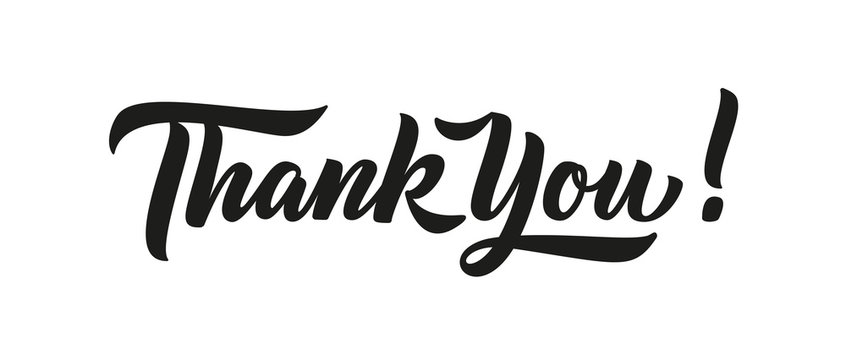